# Определение языка и VK API

В данном задании вам нужно будет:

* используя API Вконтакте, скачать комментарии к первым ста постам из пяти сообществ
* натренировать модель распознавания языков на статьях из Википедии.
* распознать язык всех комментариев, где в тексте есть 10 и более символов, и построить статистику

## VK API

Для подключения к ВКонтакте мы будем использовать VK API. Здесь есть документация к этой библиотеке https://vk-api.readthedocs.io/en/latest/

In [1]:
#!pip(3) install vk_api

/bin/sh: -c: line 0: syntax error near unexpected token `3'
/bin/sh: -c: line 0: `pip(3) install vk_api'


In [3]:
import vk_api

# здесь нужно ввести данные своего аккаунта
# когда будете сдавать, не забудьте убрать эти две строчки из ноутбука
user = ''  # вставьте сюда свой номер телефона
password = ''  # вставьте сюда свой пароль

# авторизация
vk_session = vk_api.VkApi(login=user, password=password)
vk_session.auth()

vk = vk_session.get_api()  # объект с API

Получить записи со страницы можно с помощью метода `wall.get`. Он принимает параметр `domain` — короткое имя пользователя или сообщества — и `count` — количество записей, которое вы хотите получить (максимум — 100). По Список методов для работы со стенами: https://vk.com/dev/wall

Например, вот так можно получить последние две записи с вот этой страницы https://vk.com/futureisnow. Выдача представляет собой словарь, в котором в поле `items` записан список словарей, содержащий информацию о каждой из записи. 

In [4]:
vk.wall.get(domain="futureisnow", count=2)

{'count': 8195,
 'items': [{'id': 250278,
   'from_id': -111587102,
   'owner_id': -111587102,
   'date': 1569693781,
   'marked_as_ads': 0,
   'post_type': 'post',
   'text': '',
   'signer_id': 66137348,
   'attachments': [{'type': 'photo',
     'photo': {'id': 457288585,
      'album_id': -7,
      'owner_id': -111587102,
      'user_id': 100,
      'sizes': [{'type': 'm',
        'url': 'https://sun1-26.userapi.com/c855220/v855220775/107a1a/t47yxhYop50.jpg',
        'width': 60,
        'height': 130},
       {'type': 'o',
        'url': 'https://sun1-89.userapi.com/c855220/v855220775/107a1f/i-_ScEx1I5w.jpg',
        'width': 130,
        'height': 282},
       {'type': 'p',
        'url': 'https://sun1-83.userapi.com/c855220/v855220775/107a20/zLrOpEuL10g.jpg',
        'width': 200,
        'height': 435},
       {'type': 'q',
        'url': 'https://sun1-26.userapi.com/c855220/v855220775/107a21/TZv8SdwijTM.jpg',
        'width': 320,
        'height': 694},
       {'type': 'r',
  

С помощью метода `groups.getById` можно получить информацию о сообществе, в том числе его id.

In [5]:
vk.groups.getById(group_ids="futureisnow")

[{'id': 111587102,
  'name': 'киберпанк, который мы заслужили',
  'screen_name': 'futureisnow',
  'is_closed': 0,
  'type': 'page',
  'is_admin': 0,
  'is_member': 0,
  'is_advertiser': 0,
  'photo_50': 'https://sun1-29.userapi.com/c845124/v845124938/4b879/-EzOFg-vjTg.jpg?ava=1',
  'photo_100': 'https://sun1-14.userapi.com/c845124/v845124938/4b878/Lr9NW4jLxOU.jpg?ava=1',
  'photo_200': 'https://sun1-85.userapi.com/c845124/v845124938/4b877/dqfgJ42Ir5E.jpg?ava=1'}]

Скачайте информацию о последних ста записях в следующих пабликах: https://vk.com/futureisnow, https://vk.com/eternalclassic, https://vk.com/ukrlit_memes, https://vk.com/ukrainer_net, https://vk.com/amanzohel, https://vk.com/barg_kurumk_culture

In [5]:
items = {}  # ключи — это паблики
# в словаре - полная информация о 100 постах
posts_public = {}  # словарь c id пабликов и постов


# список domain'ов, чтобы вам не копировать их самими :)
publics = ["futureisnow",
           "eternalclassic",
           "ukrlit_memes",
           "ukrainer_net",
           "amanzohel",
           "barg_kurumk_culture"]

# ваш код
for public in publics:  # составляем словарь
    posts = []  # список постов для каждого паблика
    getting = vk.wall.get(domain=public, count=100)  # выкачиваем посты
    items[public] = [getting]  # составляем словарь с инфо о постах
    for i in range(100):  # словарь из id
        if i < len(getting['items']):
            public_id = getting['items'][i]['from_id']
            posts.append(getting['items'][i]['id'])
    posts_public[public_id] = posts
print(posts_public)

{-111587102: [250278, 250258, 250225, 250201, 250170, 250138, 250098, 250053, 250051, 250033, 250015, 249986, 249964, 249891, 249874, 249846, 249817, 249793, 249768, 249726, 249698, 249672, 249625, 249606, 249588, 249454, 249434, 249353, 249328, 249272, 249241, 249224, 249149, 249123, 249102, 249092, 249042, 248988, 248949, 248924, 248908, 248865, 248813, 248759, 248732, 248712, 248616, 248597, 248563, 248551, 248530, 248497, 248404, 248341, 248312, 248284, 248251, 248212, 248196, 248185, 248087, 248054, 248033, 248023, 247845, 247715, 247702, 247689, 247646, 247603, 247556, 247495, 247418, 247379, 247363, 247323, 247312, 247277, 247249, 247208, 247152, 247134, 247109, 247062, 247042, 247014, 246921, 246920, 246831, 246790, 246768, 246740, 246735, 246706, 246696, 246666, 246647, 246550, 246518, 246501], -129440544: [1013624, 1025891, 1025859, 1025827, 1025787, 1025738, 1025705, 1025682, 1025627, 1025590, 1025568, 1025542, 1025522, 1025489, 1025460, 1025422, 1025381, 1025305, 1025304, 1

Найдите в документации (https://vk.com/dev/wall) метод для получения комментариев и получите первые сто комментариев каждого поста из выборки для каждого паблика.

In [6]:
corpora = {}  # словарь: ключи - id постов

# ваш код
# достаем id постов и комментарии к ним
for key, value in posts_public.items():
    for el in value:
        comm_all = []  # список для комментариев
        # вытаскиваем комментарии
        comments = vk.wall.getComments(owner_id=str(key), post_id=str(el),
                                       count=100)
        for i in range(100):  # достаем текст комментариев
            if i < len(comments['items']):
                if 'text' in comments['items'][i]:  # текстовые комментарии
                    commen = comments['items'][i]['text']
                    if len(commen) >= 10:
                        comm_all.append(commen)
        post_name = str(el) + '_' + str(key)
        corpora[post_name] = comm_all
print(corpora)

{'250278_-111587102': ['Морг, ноут и котик. Шикарно', 'Только за шасси дорого же, ну', 'Приезжайте, забирайте', 'High tech, low life. Все по канону', 'Ну нормально, гаражный сервер.', 'дроп с сисадмина?', 'Это настолько гротескно, что абсолютно гениально. Ночь, сервак, морг и кошачья жопа. Я бы на стену повесил', 'Господа, кто шарит в железе, гляньте пожалуйста. Ценник сильно загнул? Посмотри объявление "Компьютер, монитор. Полный комплект" на Авито:  \n \nhttps://www.avito.ru/nizhnevartovsk/nastolnye_kompyutery/kompyuter_monitor._polnyy_komplekt_1793435939?utm_campaign=native&utm_medium=item_page_ios&utm_source=soc_sharing', 'Ночь\nМорг\nСервак\nКотейка\nБессмысленный и тусклый свет...', 'На этой фотографии идеально всё', 'Этот сервак наверное похоронный сайт держал', 'Кот нашел на помойке сервак и решил загнать его на авито?', 'Ну логично что продает\nЕму в морге он уже не понадобится'], '250258_-111587102': ['Щас еще вишневая девятка есть', 'Вишнёвая🤤🤢', 'Это Виллалобос?', 'Без неё 

**Задание со звездочкой:** вы могли заметить, что если обращаться к каждому посту отдельно, то все занимает довольно продолжительное время (около пяти минут). Найдите в документации vk_api способ сделать это быстрее.

In [ ]:
corpora = {}

# ваш улучшенный код

## Тренировка моделей

In [134]:
!pip install wikipedia

  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
You should consider upgrading via the 'pip install --upgrade pip' command.


In [135]:
!pip install nltk

You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
from collections import Counter

import nltk
import wikipedia

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

В наших комментариях встречались русский, украинский, английский и бурятский.

In [13]:
langs = {'ru', 'uk', 'en', 'bxr'}

Скачайте документы, на которых вы будете обучать свои модели. Для наших целей хорошо иметь для каждого языка корпус размером около 50 статей.

In [14]:
# найдите нужный код, не вставляйте лишний (!)
# документы из википедии по 50 статей на каждый язык


def get_texts_for_lang(lang, n=50):
    wiki_content = []  # список для хранения информации
    wikipedia.set_lang(lang)  # язык
    pages = wikipedia.random(n)
    for page_name in pages:  # cкачивание статей
        # cписок из работающих статей: заголовок, контент
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title,
                                            page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content


wiki_texts = {}  # словарь: клюи - языки, значения - контент статьи
for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Бонвен


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Ганев
Skip Жужгов, Николай Васильевич


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Правительство Путина


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip DAX (значения)


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Губа Старцева (Терский берег)
ru 44
bxr 50


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Theobald Butler
Skip Hopi (disambiguation)


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip K-12 education in the United States
en 47


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Карапетян


/Users/macbook/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/macbook/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Skip Подурі
uk 48


In [162]:
!pip install sklearn

  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
from sklearn.metrics import accuracy_score

Сделайте определялку на частотах слов.

In [18]:
# найдите нужный код, не вставляйте лишний (!)


def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))


# передаем языки
for la in langs:
    collect_freqlist(wiki_texts[la])
    print(collect_freqlist)

<function collect_freqlist at 0x1a0e320c80>
<function collect_freqlist at 0x1a0e320c80>
<function collect_freqlist at 0x1a0e320c80>
<function collect_freqlist at 0x1a0e320c80>


In [19]:
freq_lists = {}  # частотный словарь для каждого языка
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

In [20]:
# определялка
def simple_lang_detect(freq_lists, text):
    counts = Counter()  # счетчик
    # словарь: ключ - язык, значение - частотный словарь
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

Сделайте определялку на символьных энграммах.

In [22]:
from sklearn import feature_extraction

In [23]:
#!pip install matplotlib==3.0.3
# !pip install seaborn

In [68]:
# найдите нужный код, не вставляйте лишний (!)

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5),
                                                     analyzer='char')
vectorizer.fit(wiki_texts['ru'])

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 5), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [213]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/macbook/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['maximum', 'cm', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [214]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2),
                                                     analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())
])

In [215]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

In [244]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
     steps=[('vctr', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
  ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Определение языка

Определите язык каждого комментария в каждом паблике с помощью определялки на частотах слов и покажите доли языков среди комментариев для каждого паблика.

In [245]:
lang_detects_freqs = {}  # словарь с частотностью языков


# ваш код
for key, value in posts_public.items():  # для каждого паблика
    counter_ru = 0  # счетчики
    counter_uk = 0
    counter_bxr = 0
    counter_en = 0
    counter_tot = 0
    counter_unknown = 0
    for k, v in corpora.items():
        if str(key) in k:
            if len(v) >= 1:  # только, где есть комментарии
                for i in range(100):
                    if i < len(v):
                        test_t = corpora[str(k)][i]
                        # ищем языки
                        fin_lan = simple_lang_detect(freq_lists, test_t)
                        counter_tot += 1
                        if len(fin_lan) >= 1:
                            if fin_lan[0][1] >= 1:
                                for lng in fin_lan[0]:
                                    if lng == 'ru':
                                        counter_ru += 1
                                    if lng == 'uk':
                                        counter_uk += 1
                                    if lng == 'bxr':
                                        counter_bxr += 1
                                    if lng == 'en':
                                        counter_en += 1
                            if fin_lan[0][1] < 1:
                                counter_unknown += 1
    # пополняем словарь
    lang_detects_freqs[key] = {}
    lang_detects_freqs[key]['ru'] = counter_ru
    lang_detects_freqs[key]['uk'] = counter_uk
    lang_detects_freqs[key]['bxr'] = counter_bxr
    lang_detects_freqs[key]['en'] = counter_en
    lang_detects_freqs[key]['total'] = counter_tot
    lang_detects_freqs[key]['unknown'] = counter_unknown


# результат за исключением неопределенных языков
print('\n\nРезультат без неопределенных языков\n')
for keys, values in lang_detects_freqs.items():
    print('Для паблика ', keys, 'доля языков такова:\n',
          'русского - ',
          round(values['ru']/(values['total']-values['unknown']), 3),
          '\nукраинского - ',
          round(values['uk']/(values['total']-values['unknown']), 3),
          '\nбурятского - ',
          round(values['bxr']/(values['total']-values['unknown']), 3),
          '\nанглийского - ',
          round(values['en']/(values['total']-values['unknown']), 3), '\n')


print('\n\nРезультат с неопределенными языками\n')
for keys, values in lang_detects_freqs.items():
    print('Для паблика ', keys, 'доля языков такова:\n',
          'русского - ',
          round(values['ru']/values['total'], 3),
          '\nукраинского - ',
          round(values['uk']/values['total'], 3),
          '\nбурятского - ',
          round(values['bxr']/values['total'], 3),
          '\nанглийского - ',
          round(values['en']/values['total'], 3),
          '\nопределялка не определяет язык - ',
          round(values['unknown']/values['total'], 3), '\n')



Результат без неопределенных языков

Для паблика  -111587102 доля языков такова:
 русского -  0.965 
украинского -  0.022 
бурятского -  0.003 
английского -  0.01 

Для паблика  -129440544 доля языков такова:
 русского -  0.045 
украинского -  0.0 
бурятского -  0.083 
английского -  0.87 

Для паблика  -131348832 доля языков такова:
 русского -  0.457 
украинского -  0.517 
бурятского -  0.007 
английского -  0.02 

Для паблика  -5164516 доля языков такова:
 русского -  0.352 
украинского -  0.648 
бурятского -  0.0 
английского -  0.0 

Для паблика  -66347916 доля языков такова:
 русского -  0.658 
украинского -  0.053 
бурятского -  0.289 
английского -  0.0 

Для паблика  -95189895 доля языков такова:
 русского -  0.819 
украинского -  0.026 
бурятского -  0.155 
английского -  0.0 



Результат с неопределенными языками

Для паблика  -111587102 доля языков такова:
 русского -  0.58 
украинского -  0.014 
бурятского -  0.002 
английского -  0.006 
определялка не определяет язык 

In [246]:
from matplotlib import style
style.use('ggplot')

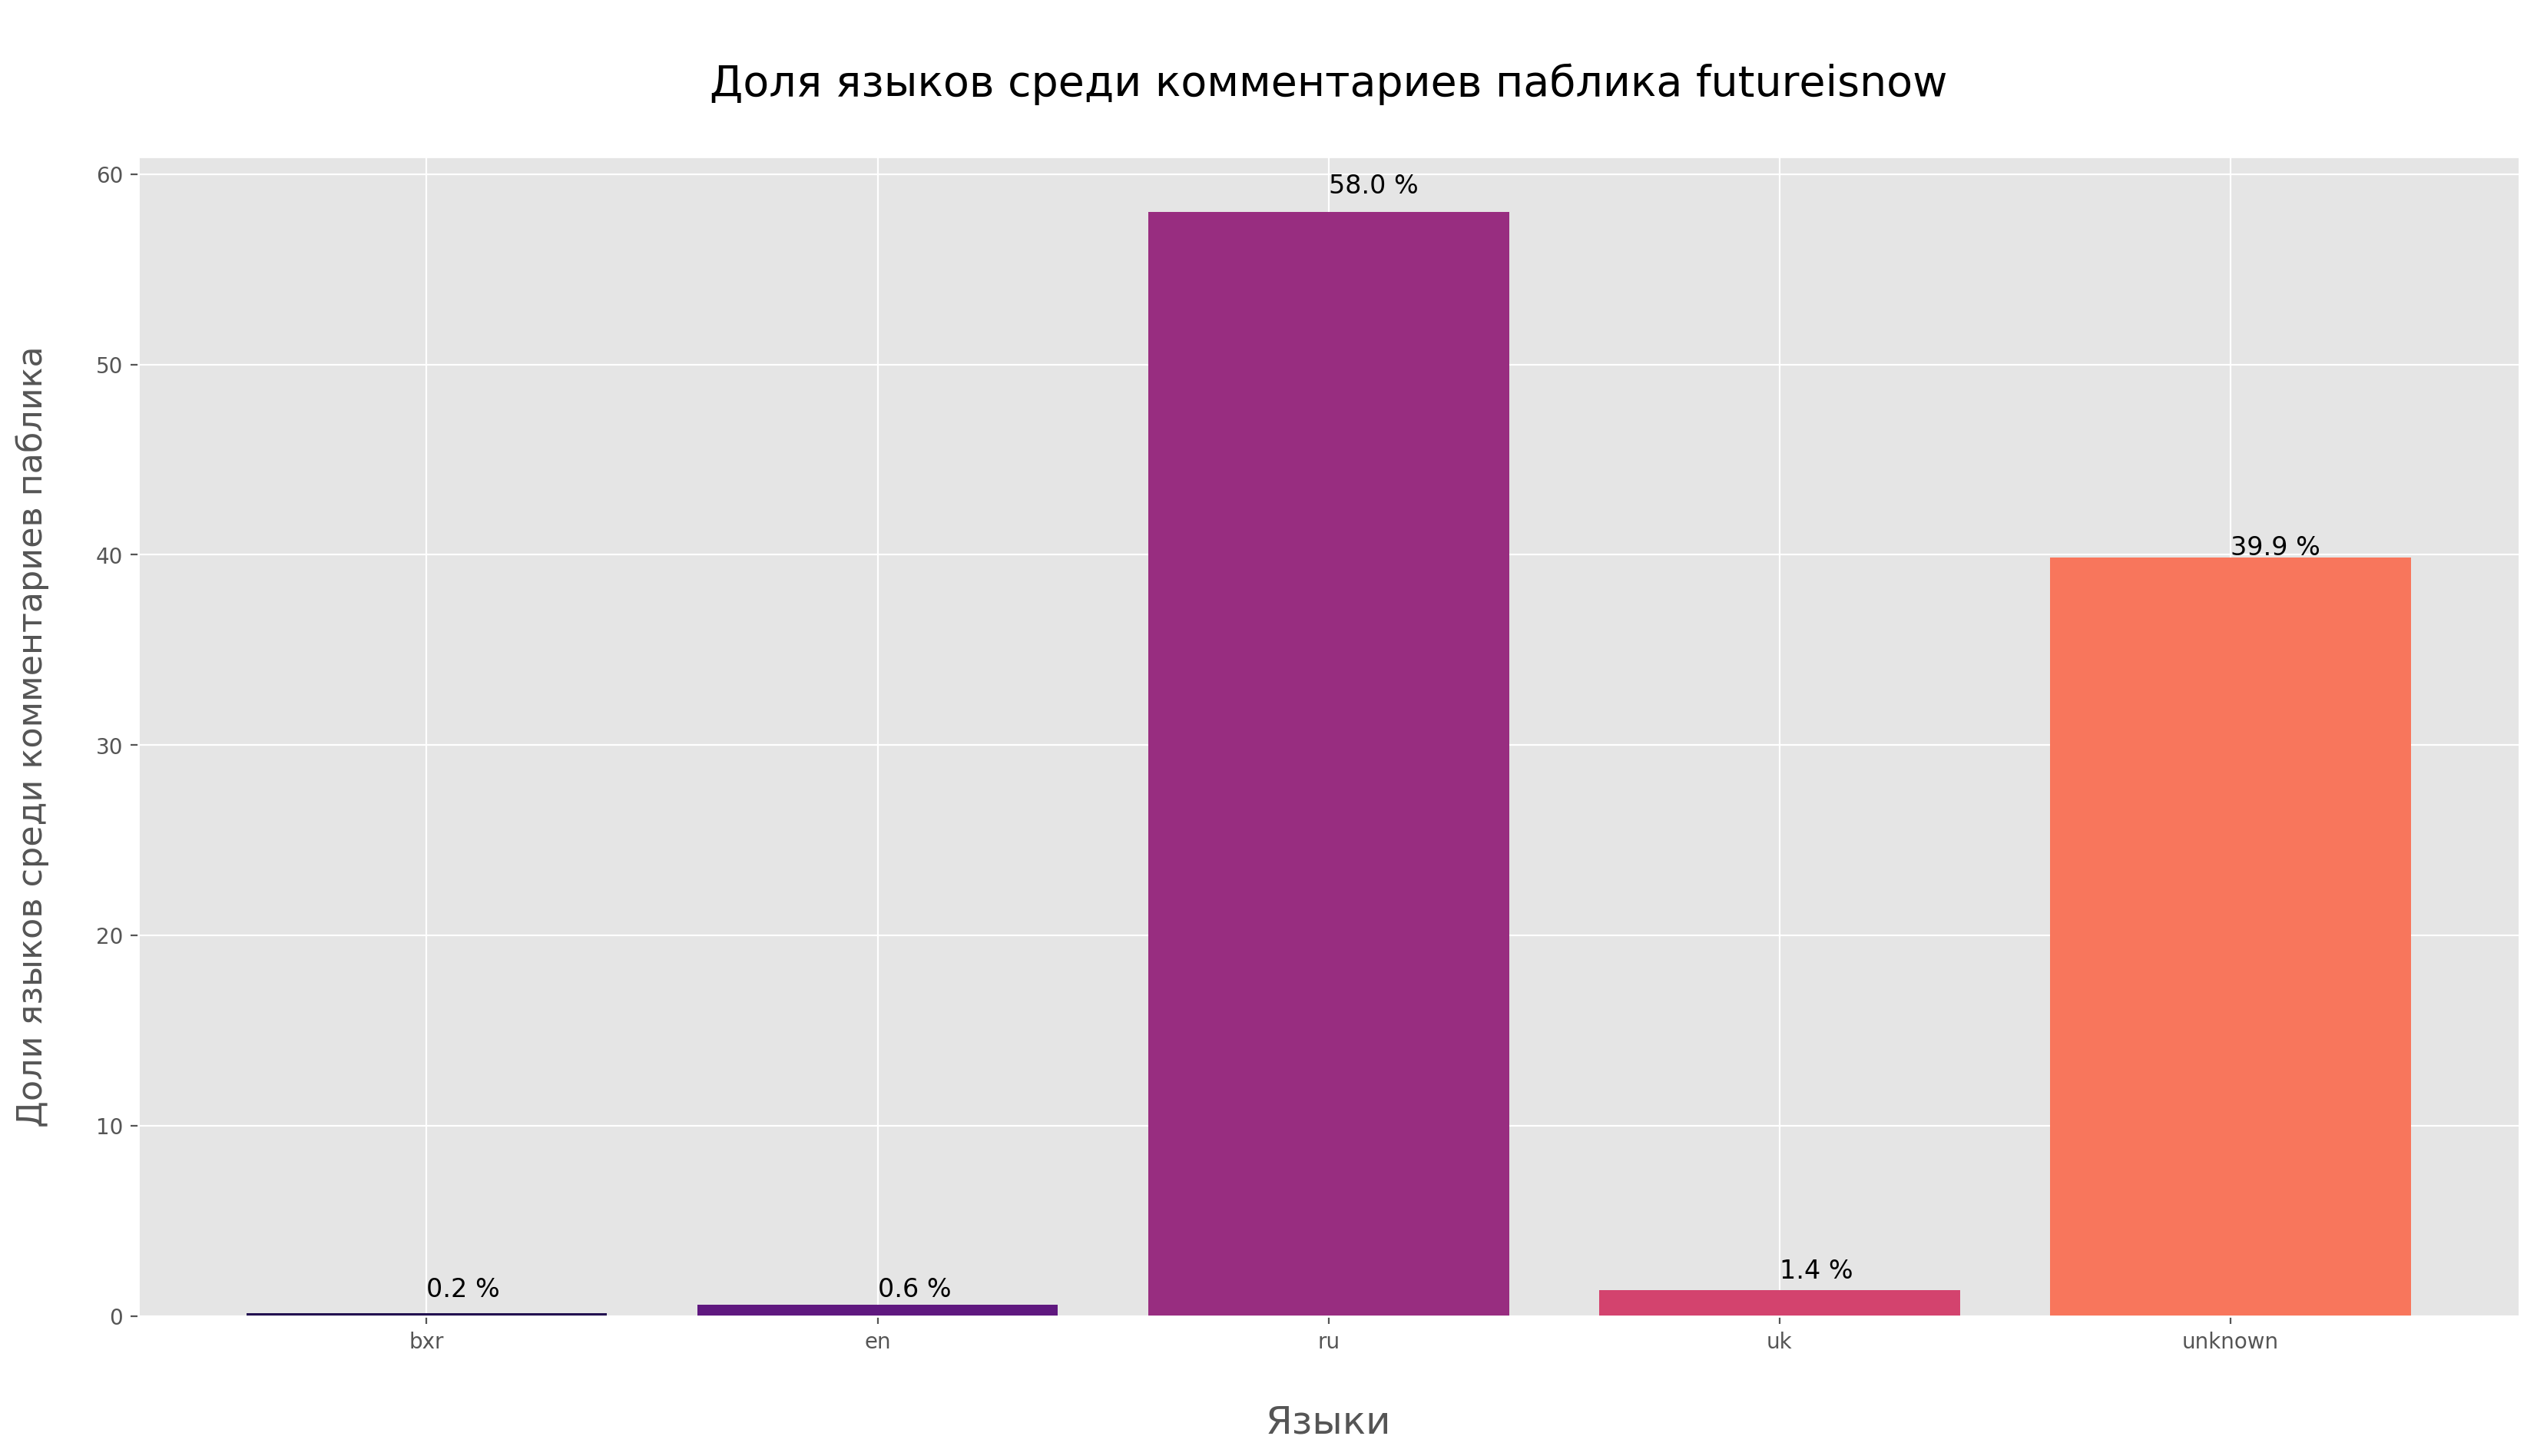

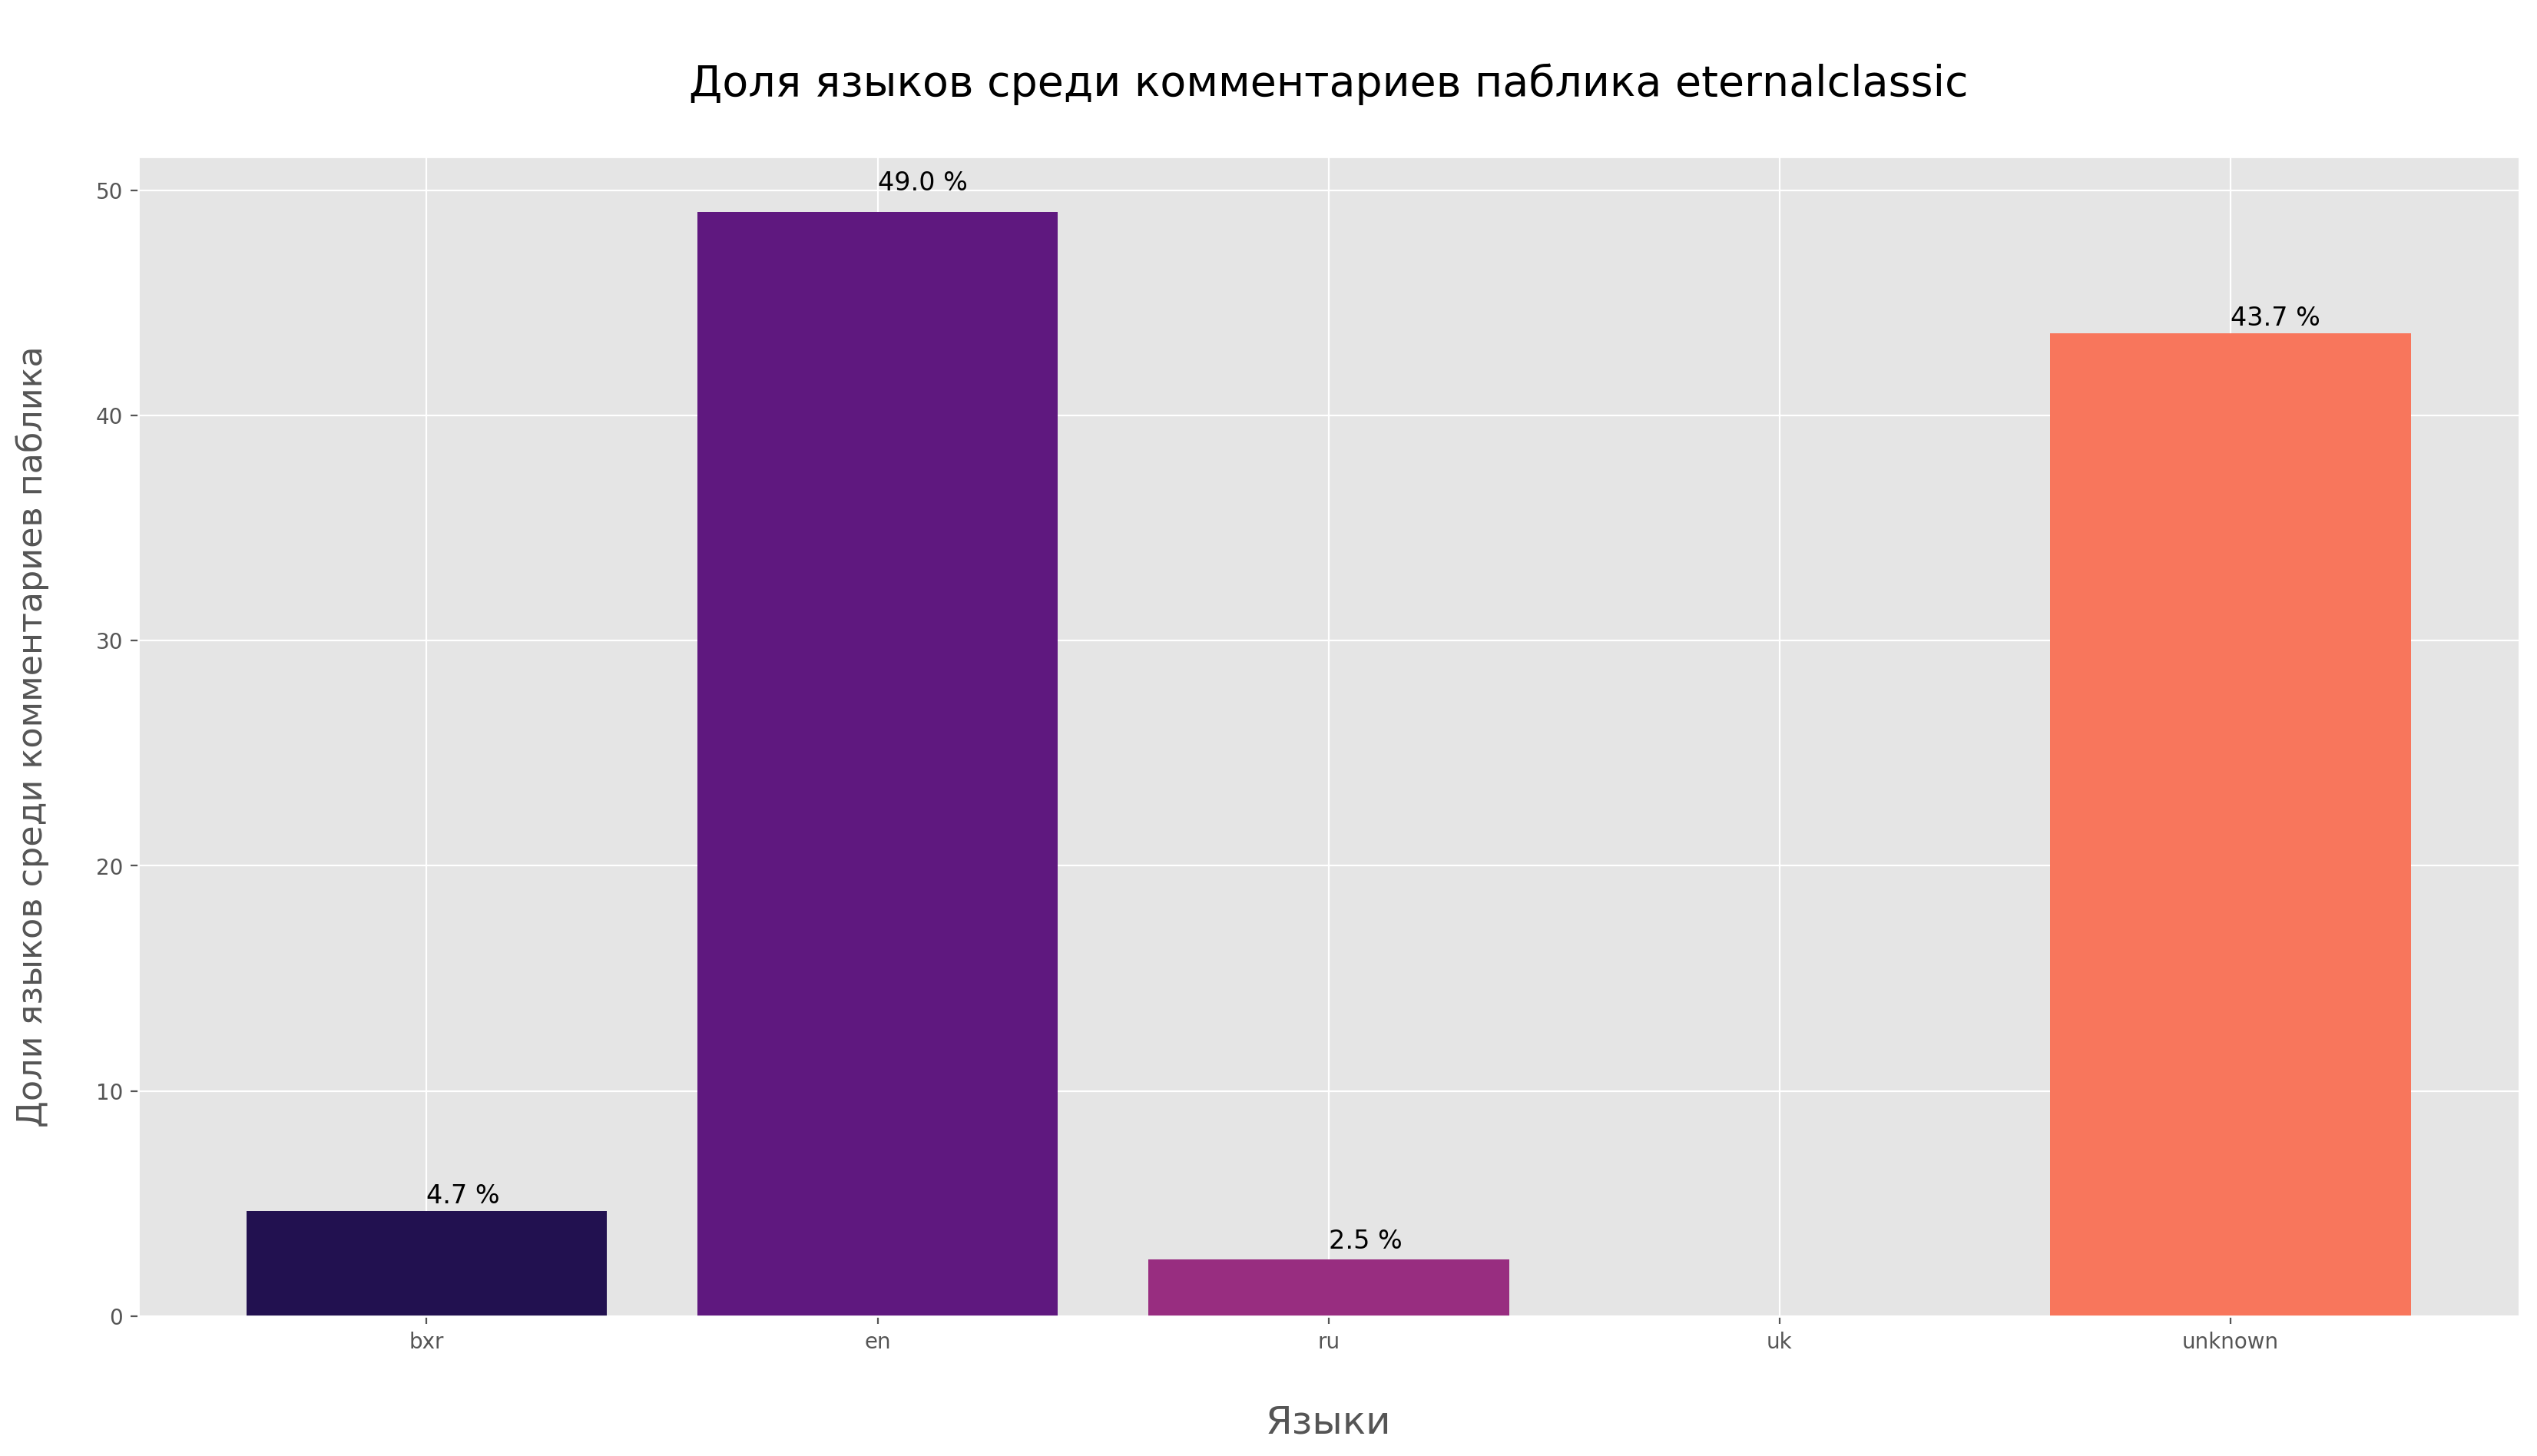

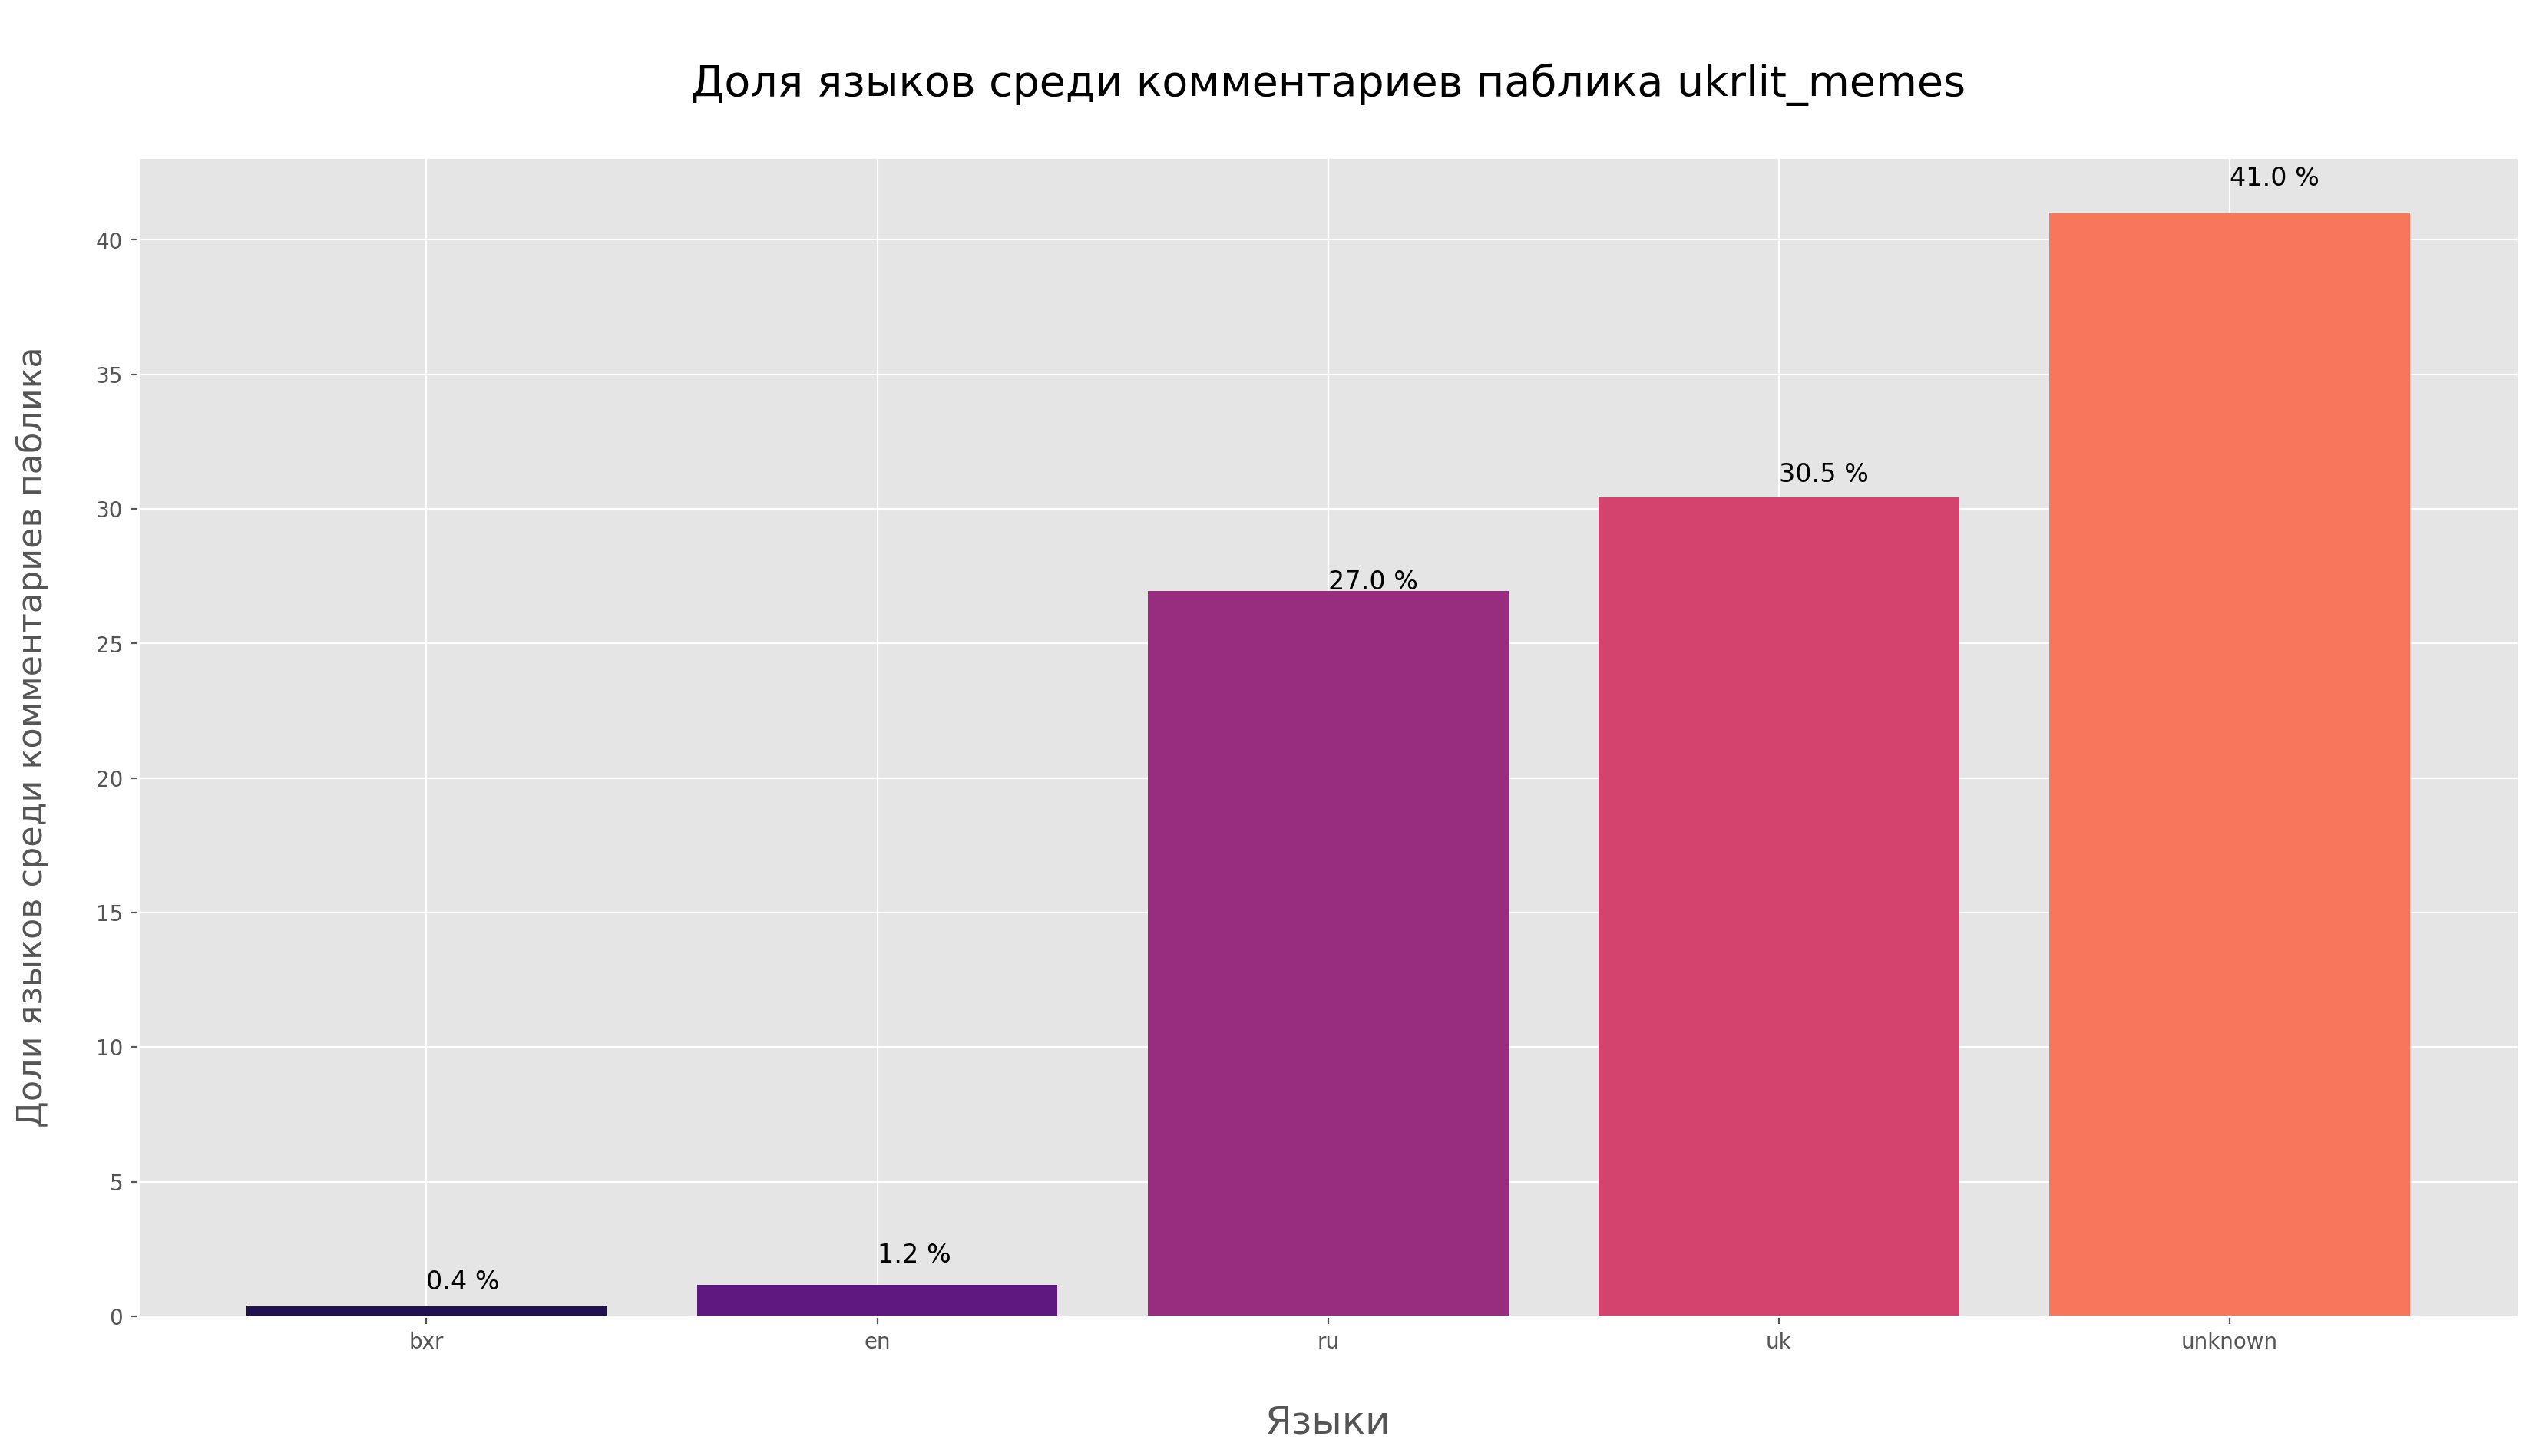

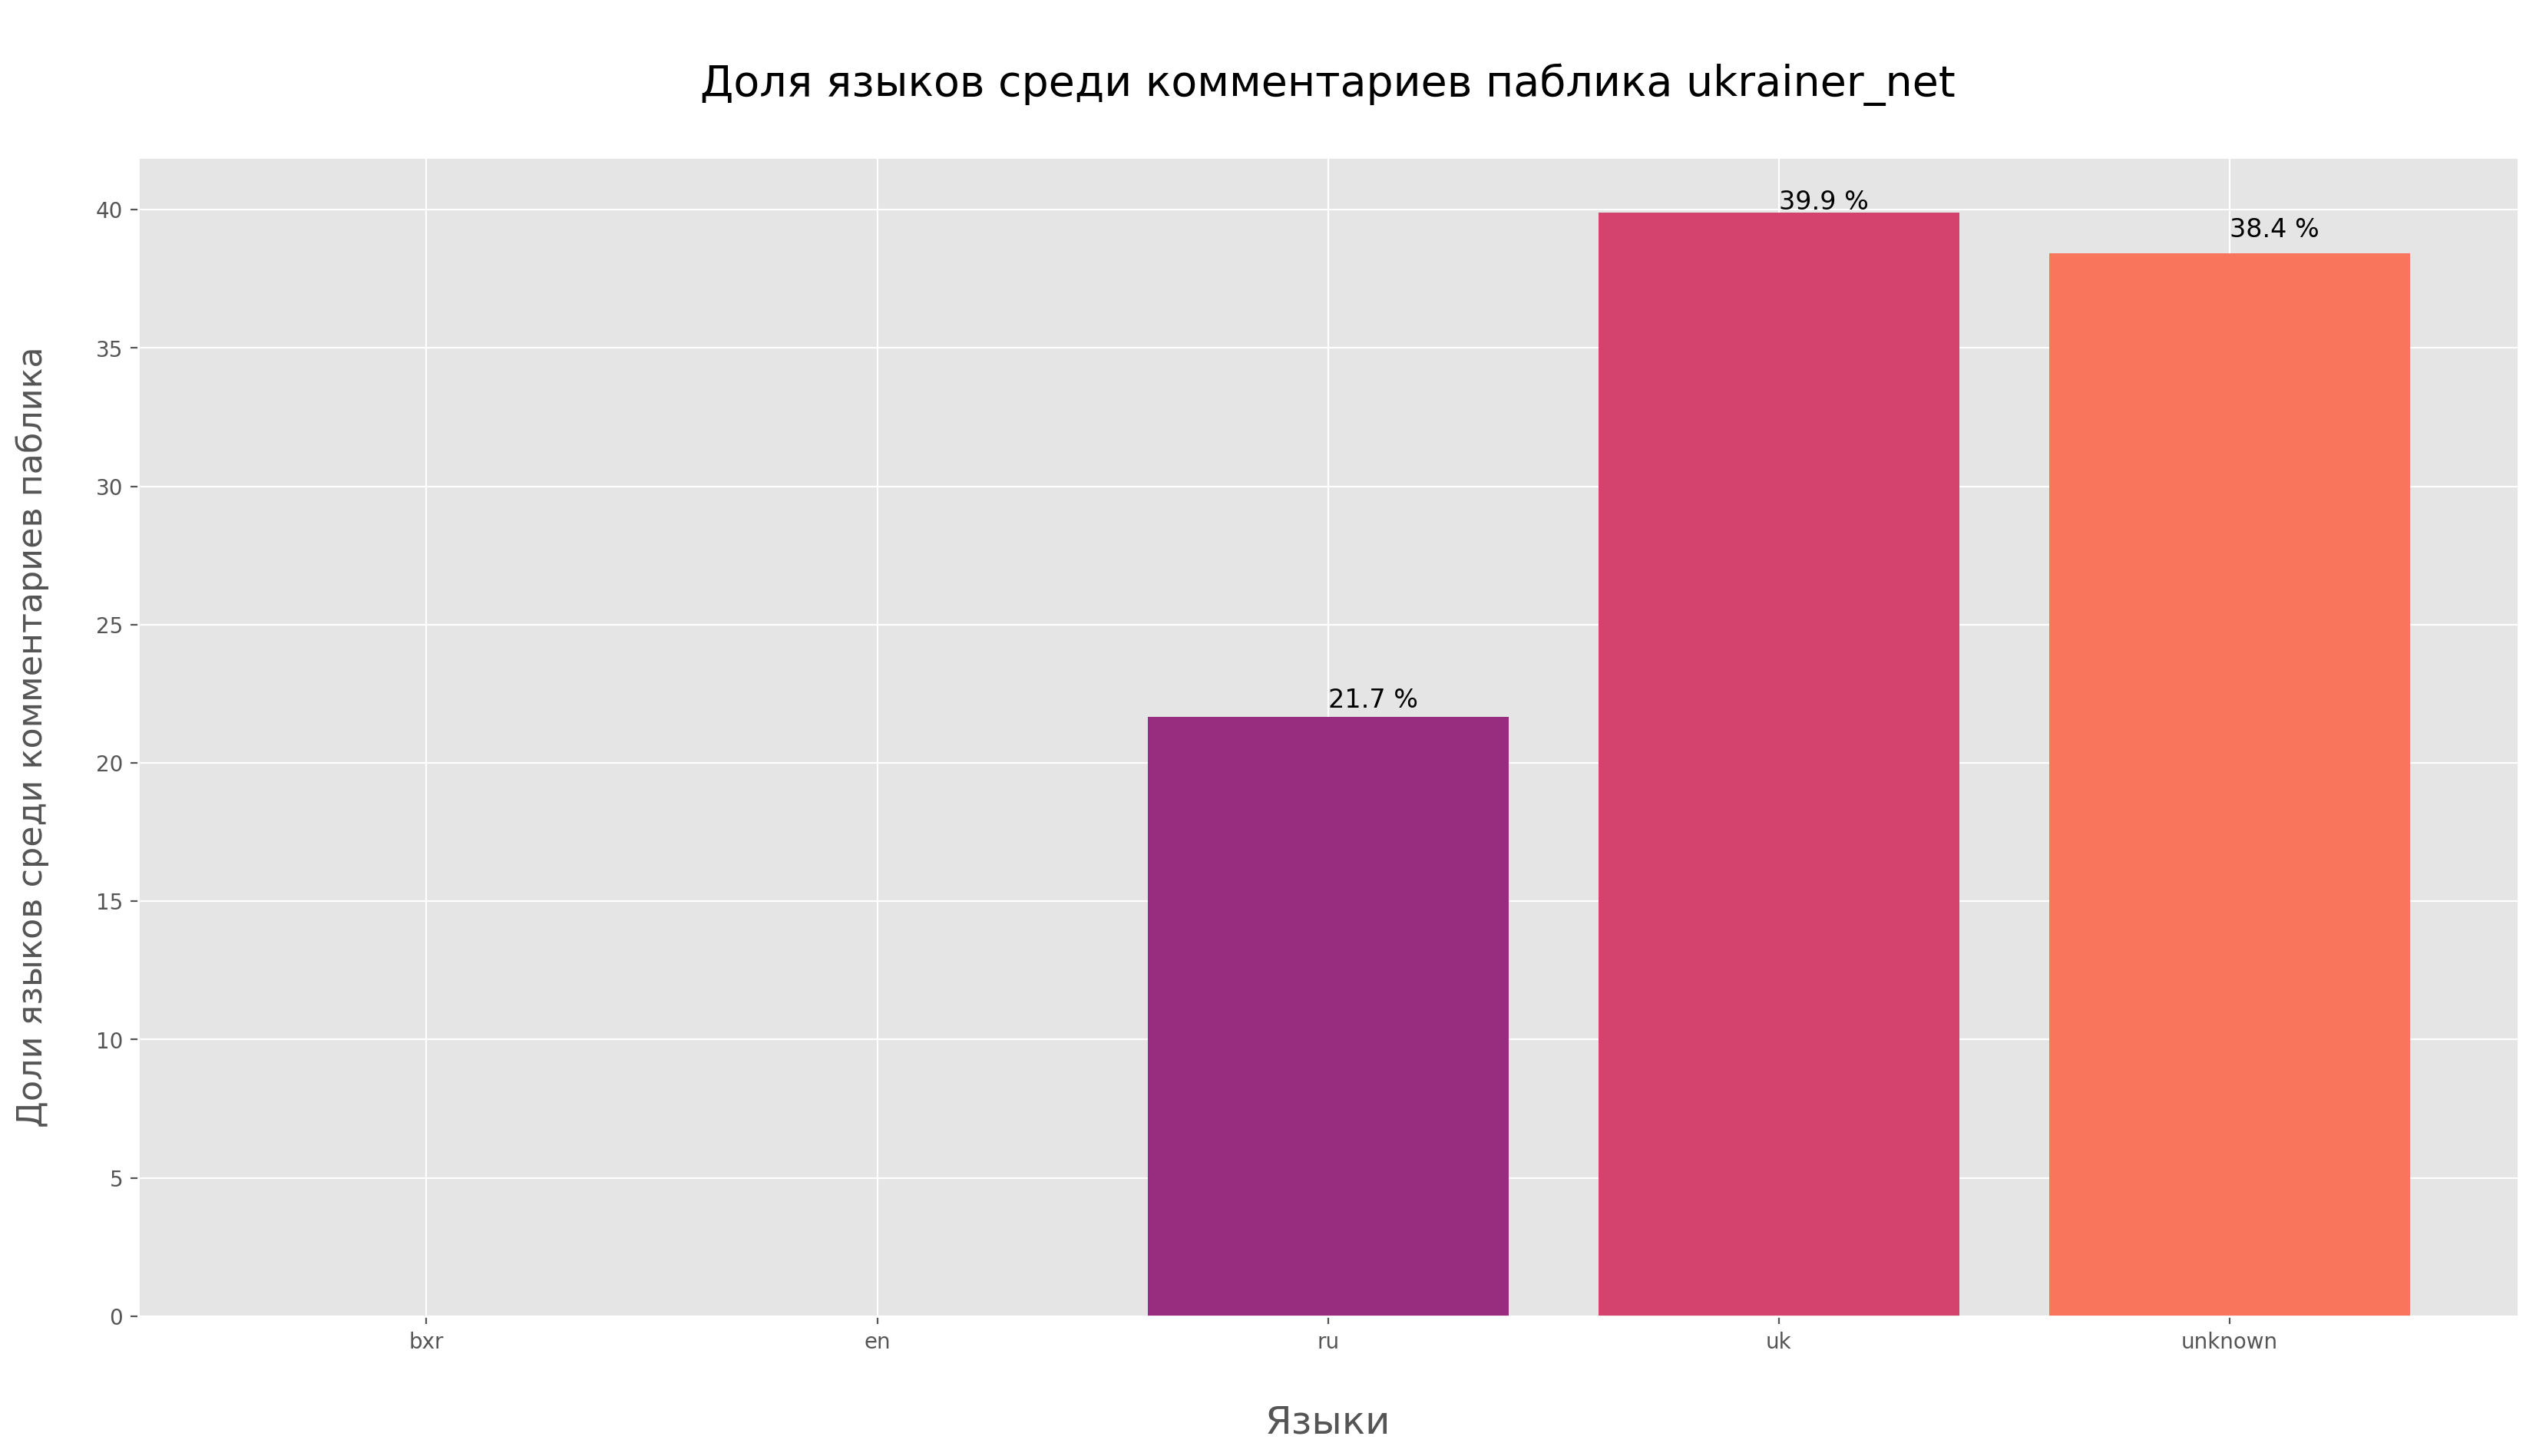

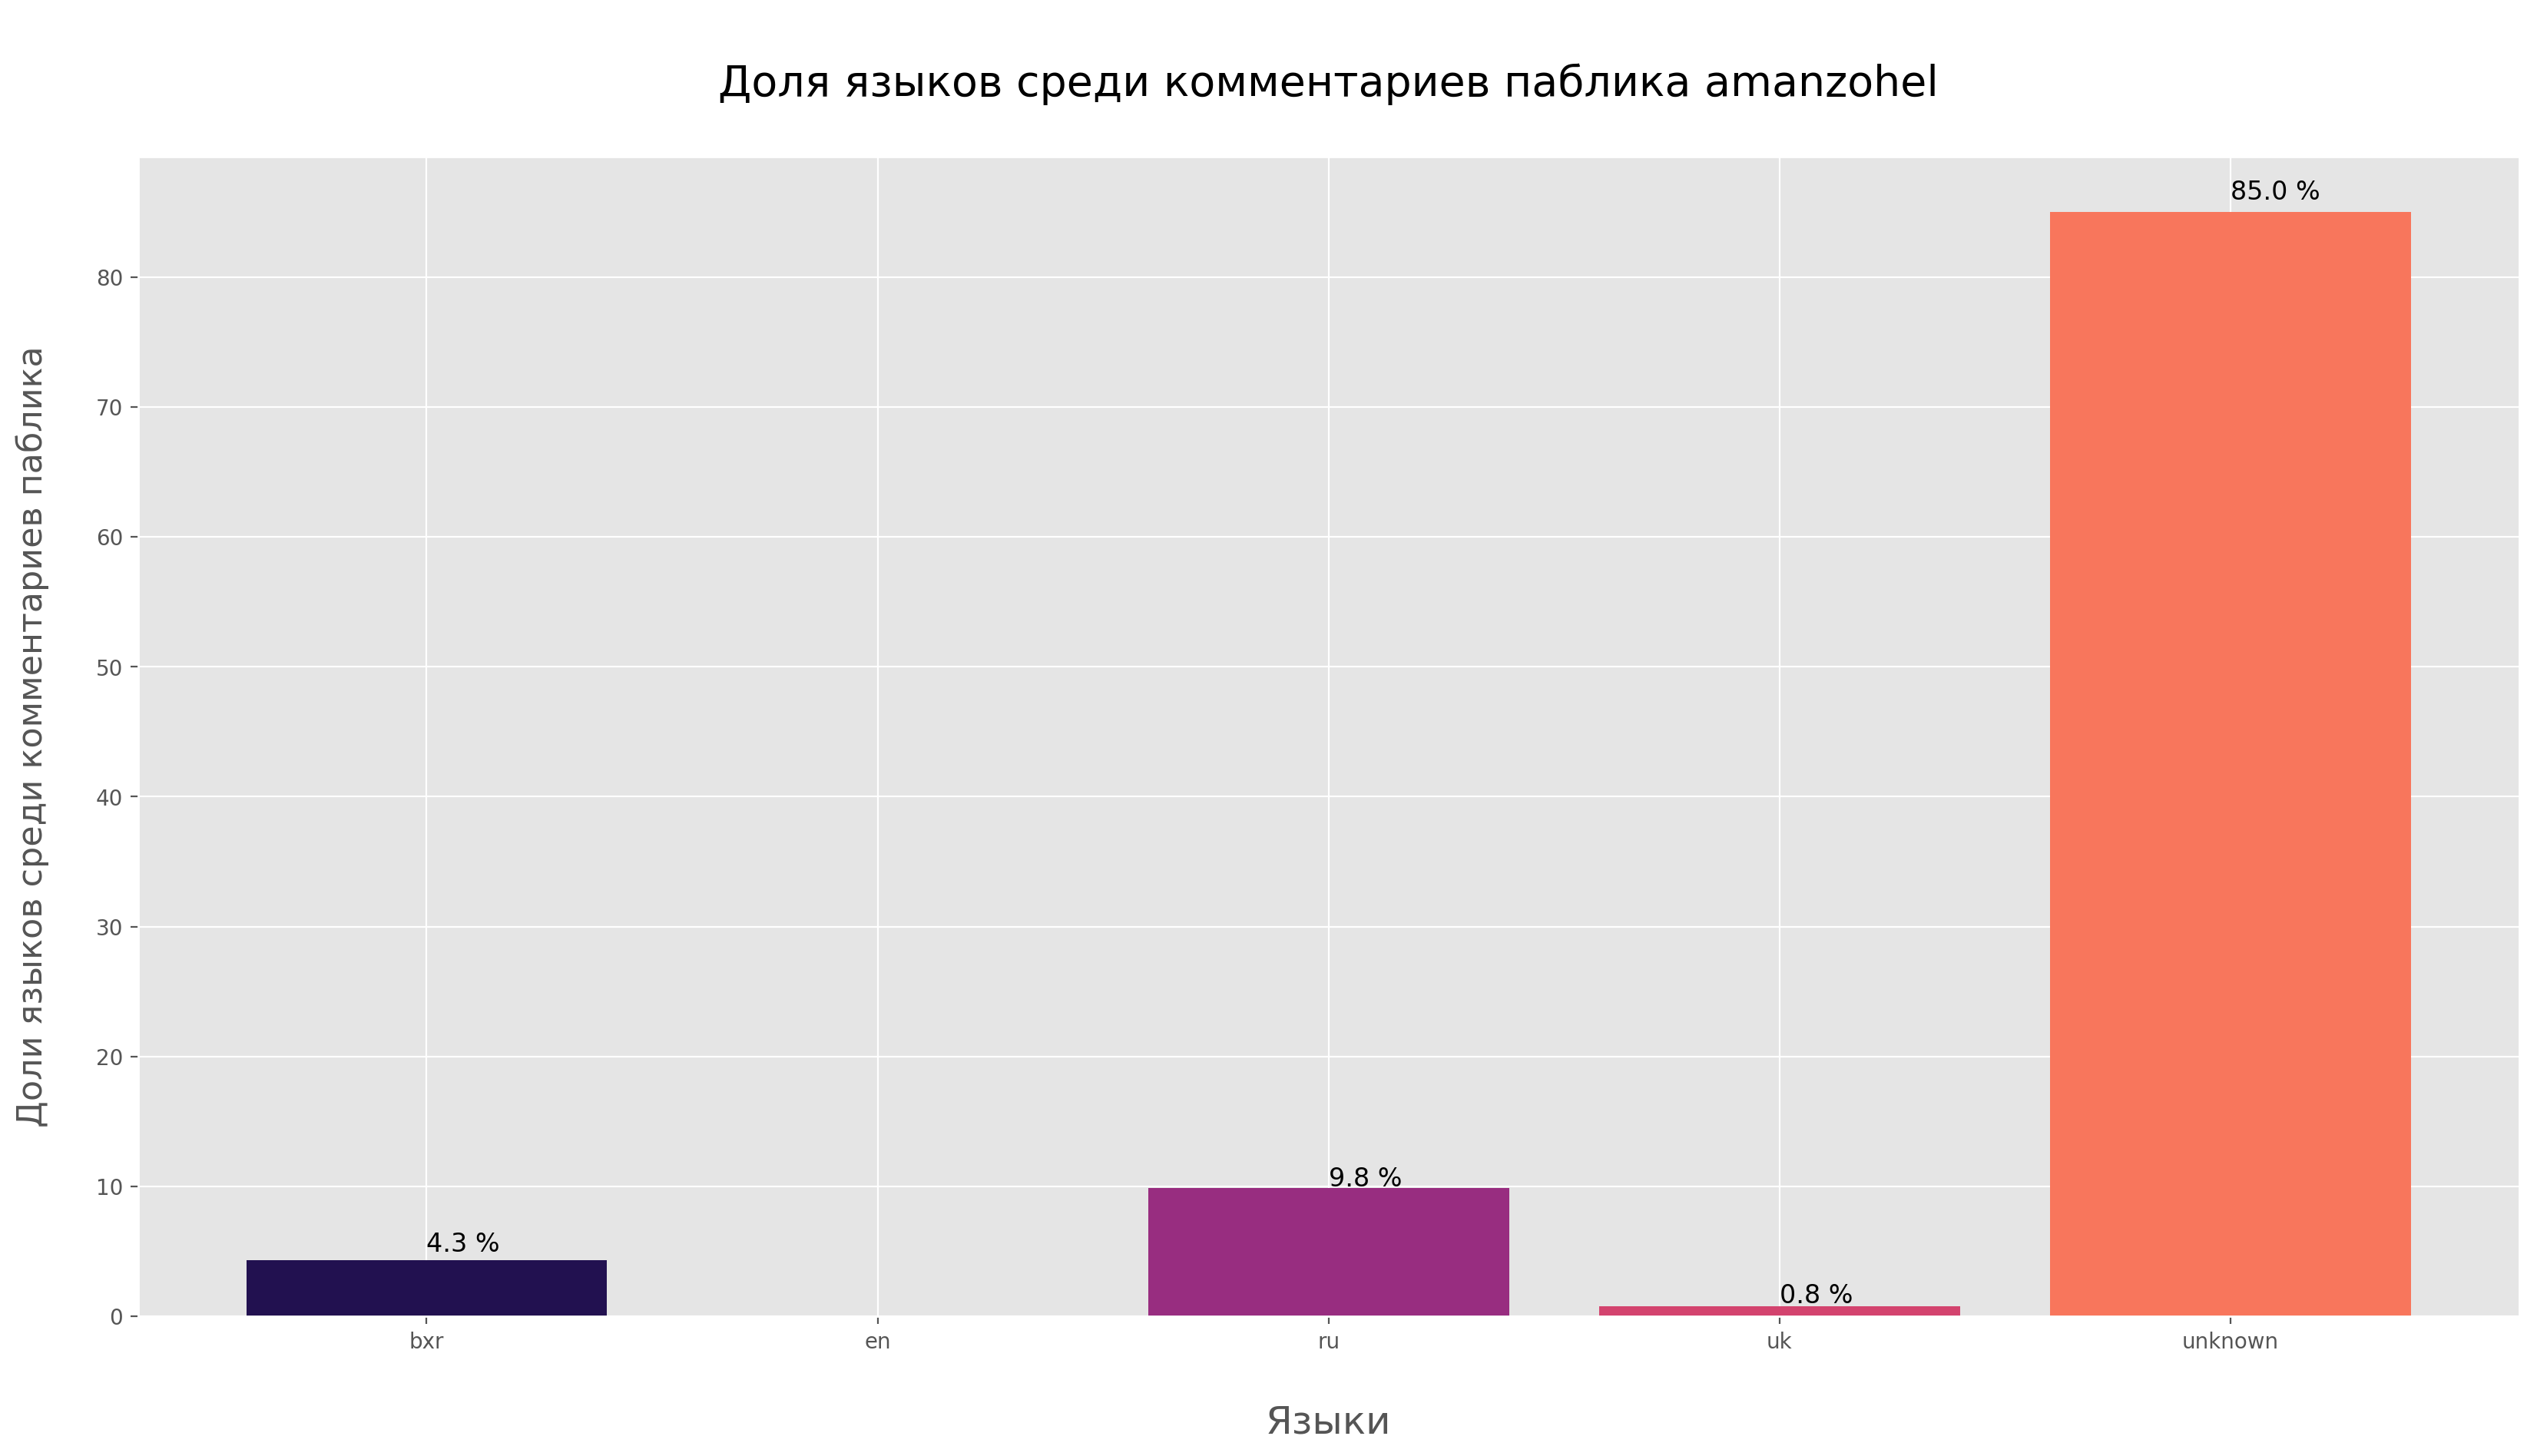

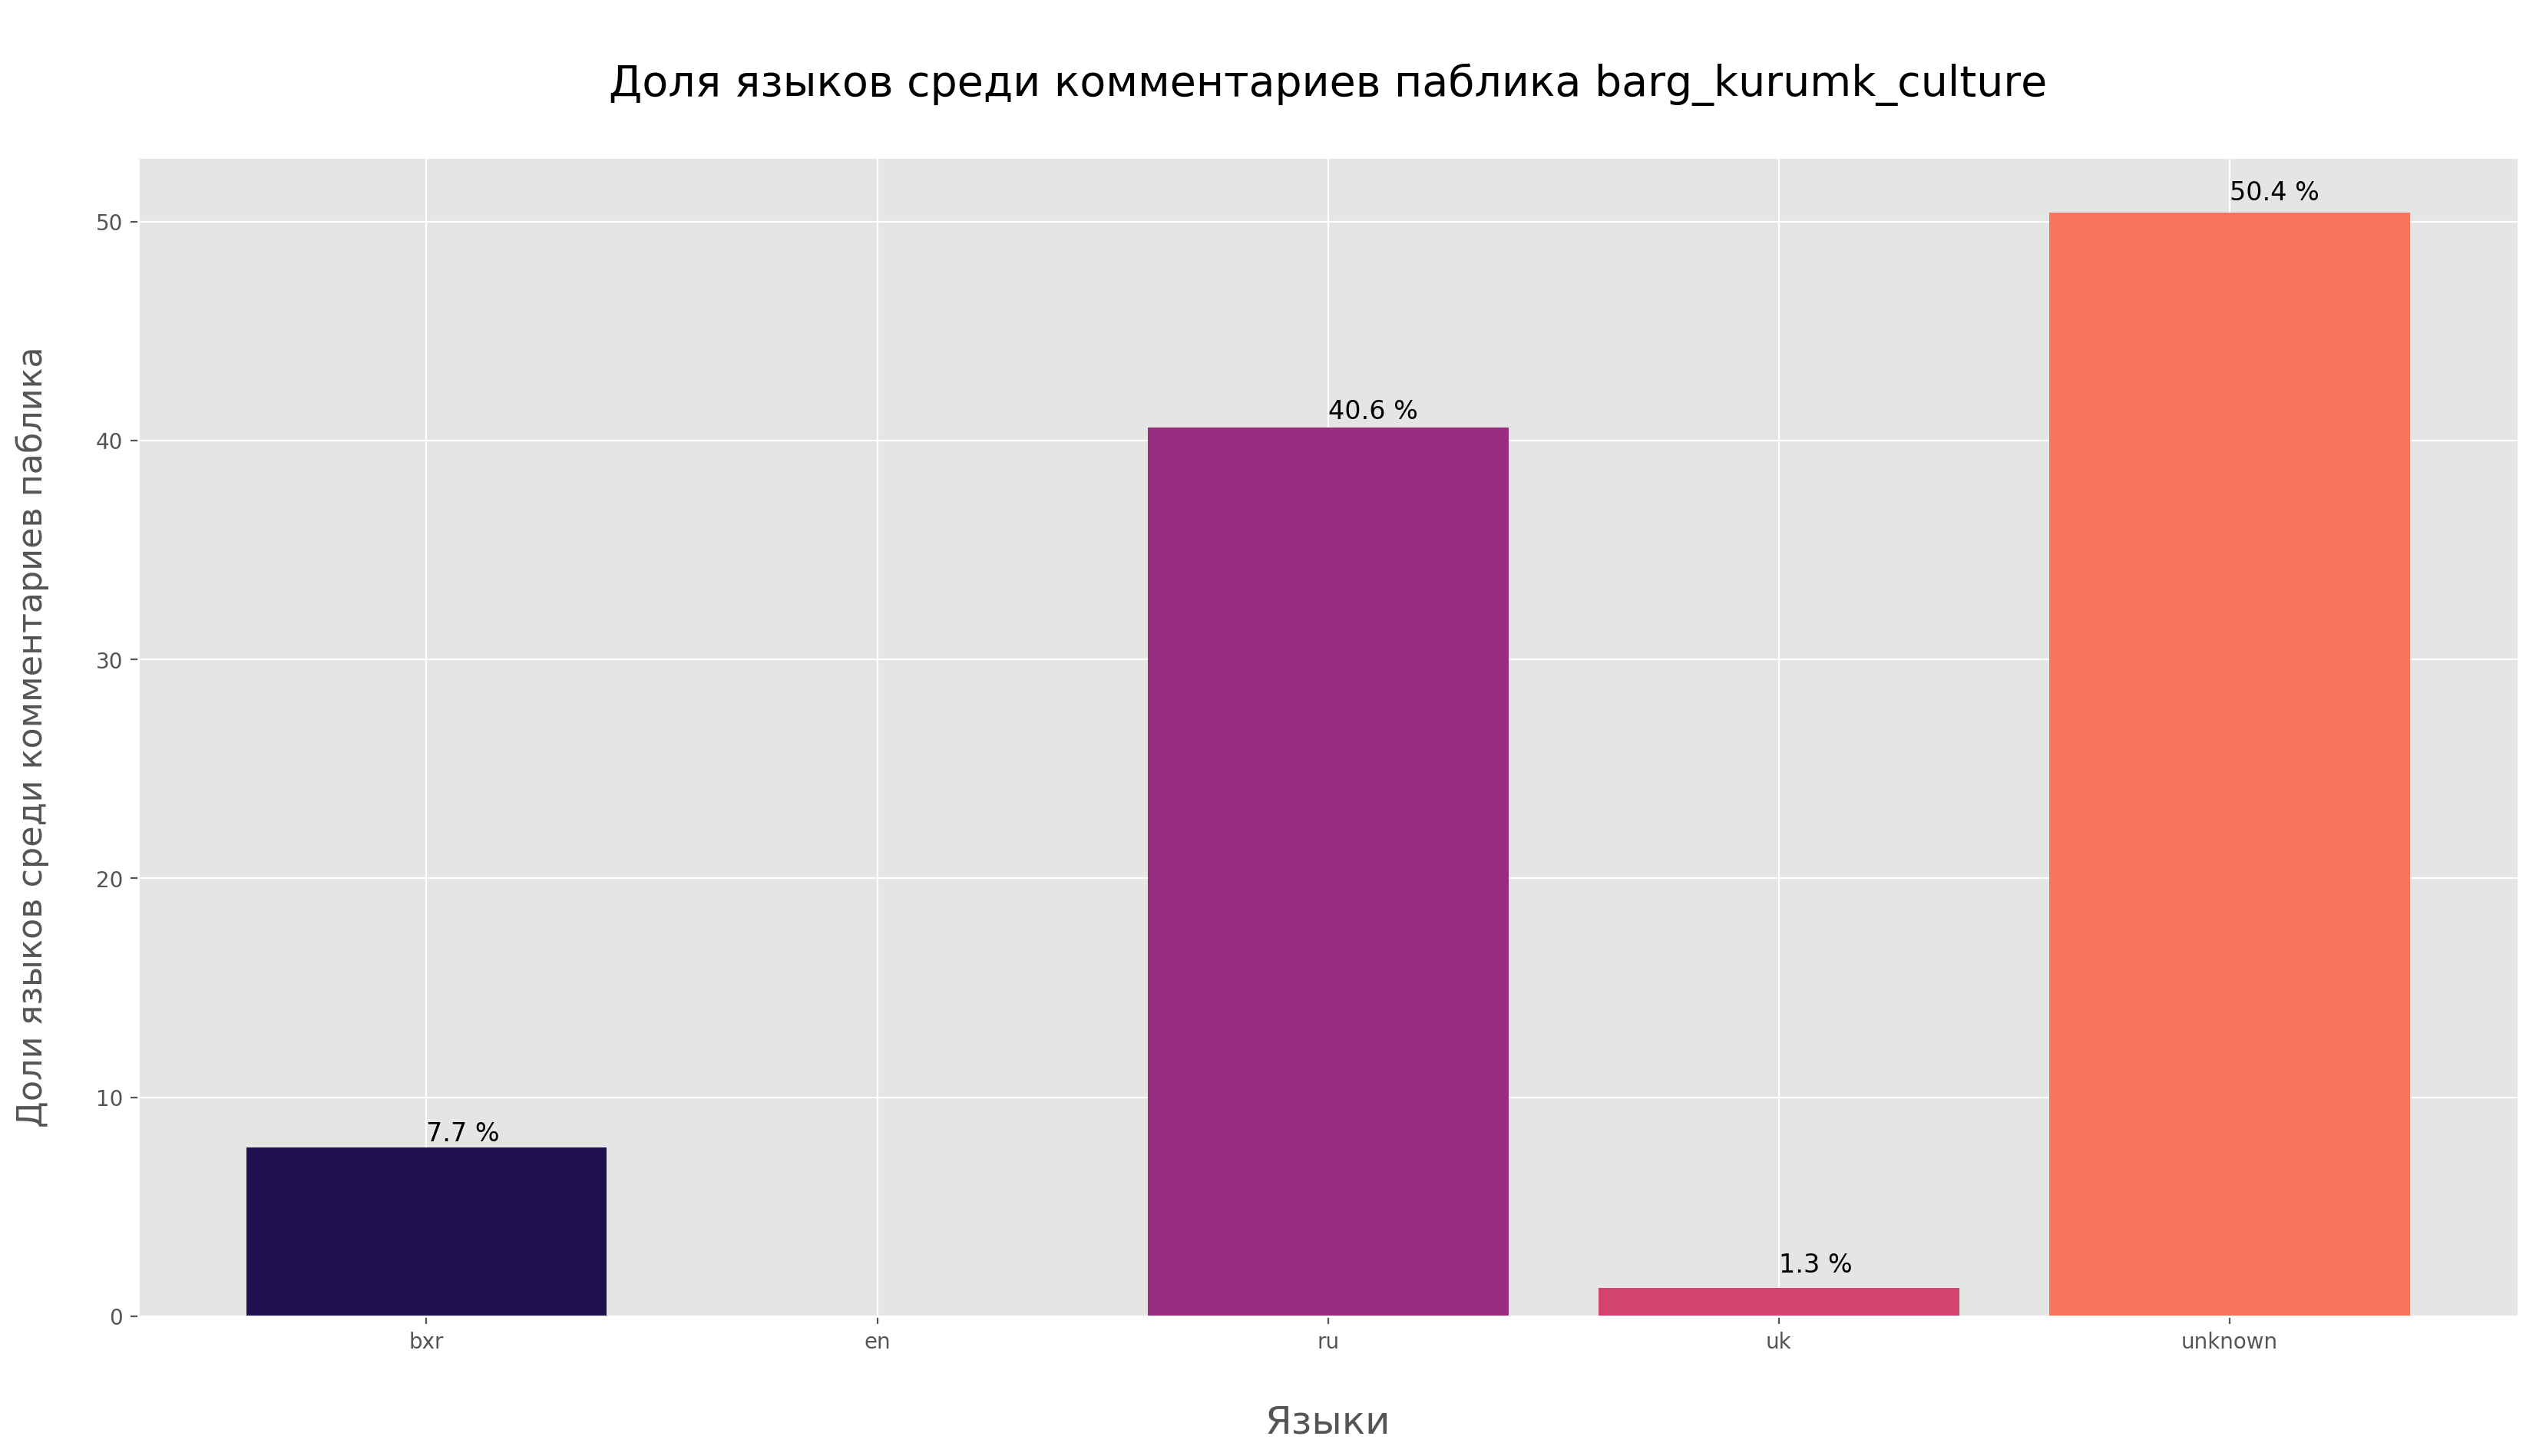

In [247]:
for_graph = {}  # словарь для графика
for k, v in lang_detects_freqs.items():
    max_lan = v['total']
    for key, values in v.items():
        if key != 'total':
            for_graph[key] = (values*100)/max_lan
    lang_nums = [c[1] for c in sorted(for_graph.items(), key=lambda x: x[0],
                                      reverse=False)]  # данные по оси y
    lang_labs = [c_1[0] for c_1 in sorted(for_graph.items(),
                                          key=lambda x: x[0], reverse=False)]
    colors = sns.color_palette('magma')  # цветовая гамма
    plt.figure(figsize=(20, 10), dpi=200)  # размер графика
    plt.bar(lang_labs, lang_nums, color=colors)  # график
    for a, b in zip(lang_labs, lang_nums):  # подписи
        if b > 0:
            plt.scatter(a, int(b), s=0)
            plt.text(a, int(b)+1, '%.1f %%' % (b), fontsize=12)
    # подбираем название
    pub_name = ''
    if k == -111587102:
        pub_name = 'futureisnow'
    if k == -129440544:
        pub_name = 'eternalclassic'
    if k == -131348832:
        pub_name = 'ukrlit_memes'
    if k == -5164516:
        pub_name = 'ukrainer_net'
    if k == -66347916:
        pub_name = 'amanzohel'
    if k == -95189895:
        pub_name = 'barg_kurumk_culture'
    naming = pub_name + '_freq_comment.png'
    for_title = '\nДоля языков среди комментариев паблика ' + pub_name + '\n'
    plt.title(for_title, fontsize=20)
    plt.ylabel('Доли языков среди комментариев паблика\n',  fontsize=16)
    plt.xlabel('\nЯзыки',  fontsize=18)
    # cкачиваем график
    plt.savefig(naming, dpi=200, fromat='png', bbox_inches='tight')

Сделайте то же самое для определителя на символьных энграммах.

In [248]:
lang_detects_ngrams = {}

# ваш код

for key, value in posts_public.items():  # для каждого паблика
    counter1_ru = 0  # счетчики
    counter1_uk = 0
    counter1_bxr = 0
    counter1_en = 0
    counter1_tot = 0
    comm_forpub = []
    for k, v in corpora.items():
        if str(key) in k:
            if len(v) >= 1:  # только, где есть комментарии
                for i in range(100):
                    if i < len(v):
                        test_t = corpora[str(k)][i]
                        comm_forpub.append(test_t)
    array_mat = clf.predict(comm_forpub)
    for langua in array_mat:
        if langua == 'ru':
            counter1_ru += 1
        if langua == 'uk':
            counter1_uk += 1
        if langua == 'bxr':
            counter1_bxr += 1
        if langua == 'en':
            counter1_en += 1
    counter1_tot = len(array_mat)
    lang_detects_ngrams[key] = {}
    lang_detects_ngrams[key]['ru'] = counter1_ru
    lang_detects_ngrams[key]['uk'] = counter1_uk
    lang_detects_ngrams[key]['bxr'] = counter1_bxr
    lang_detects_ngrams[key]['en'] = counter1_en
    lang_detects_ngrams[key]['total'] = counter1_tot


# результат
for keys, values in lang_detects_ngrams.items():
    # print(keys, values['ru'])
    print('Для паблика ', keys, 'доля языков такова:\n',
          'русского - ', round(values['ru']/values['total'], 3),
          '\nукраинского - ', round(values['uk']/values['total'], 3),
          '\nбурятского - ', round(values['bxr']/values['total'], 3),
          '\nанглийского - ', round(values['en']/values['total'], 3), '\n')

Для паблика  -111587102 доля языков такова:
 русского -  0.782 
украинского -  0.134 
бурятского -  0.04 
английского -  0.044 

Для паблика  -129440544 доля языков такова:
 русского -  0.0 
украинского -  0.001 
бурятского -  0.001 
английского -  0.998 

Для паблика  -131348832 доля языков такова:
 русского -  0.234 
украинского -  0.703 
бурятского -  0.039 
английского -  0.023 

Для паблика  -5164516 доля языков такова:
 русского -  0.133 
украинского -  0.788 
бурятского -  0.059 
английского -  0.02 

Для паблика  -66347916 доля языков такова:
 русского -  0.13 
украинского -  0.012 
бурятского -  0.858 
английского -  0.0 

Для паблика  -95189895 доля языков такова:
 русского -  0.474 
украинского -  0.081 
бурятского -  0.44 
английского -  0.004 



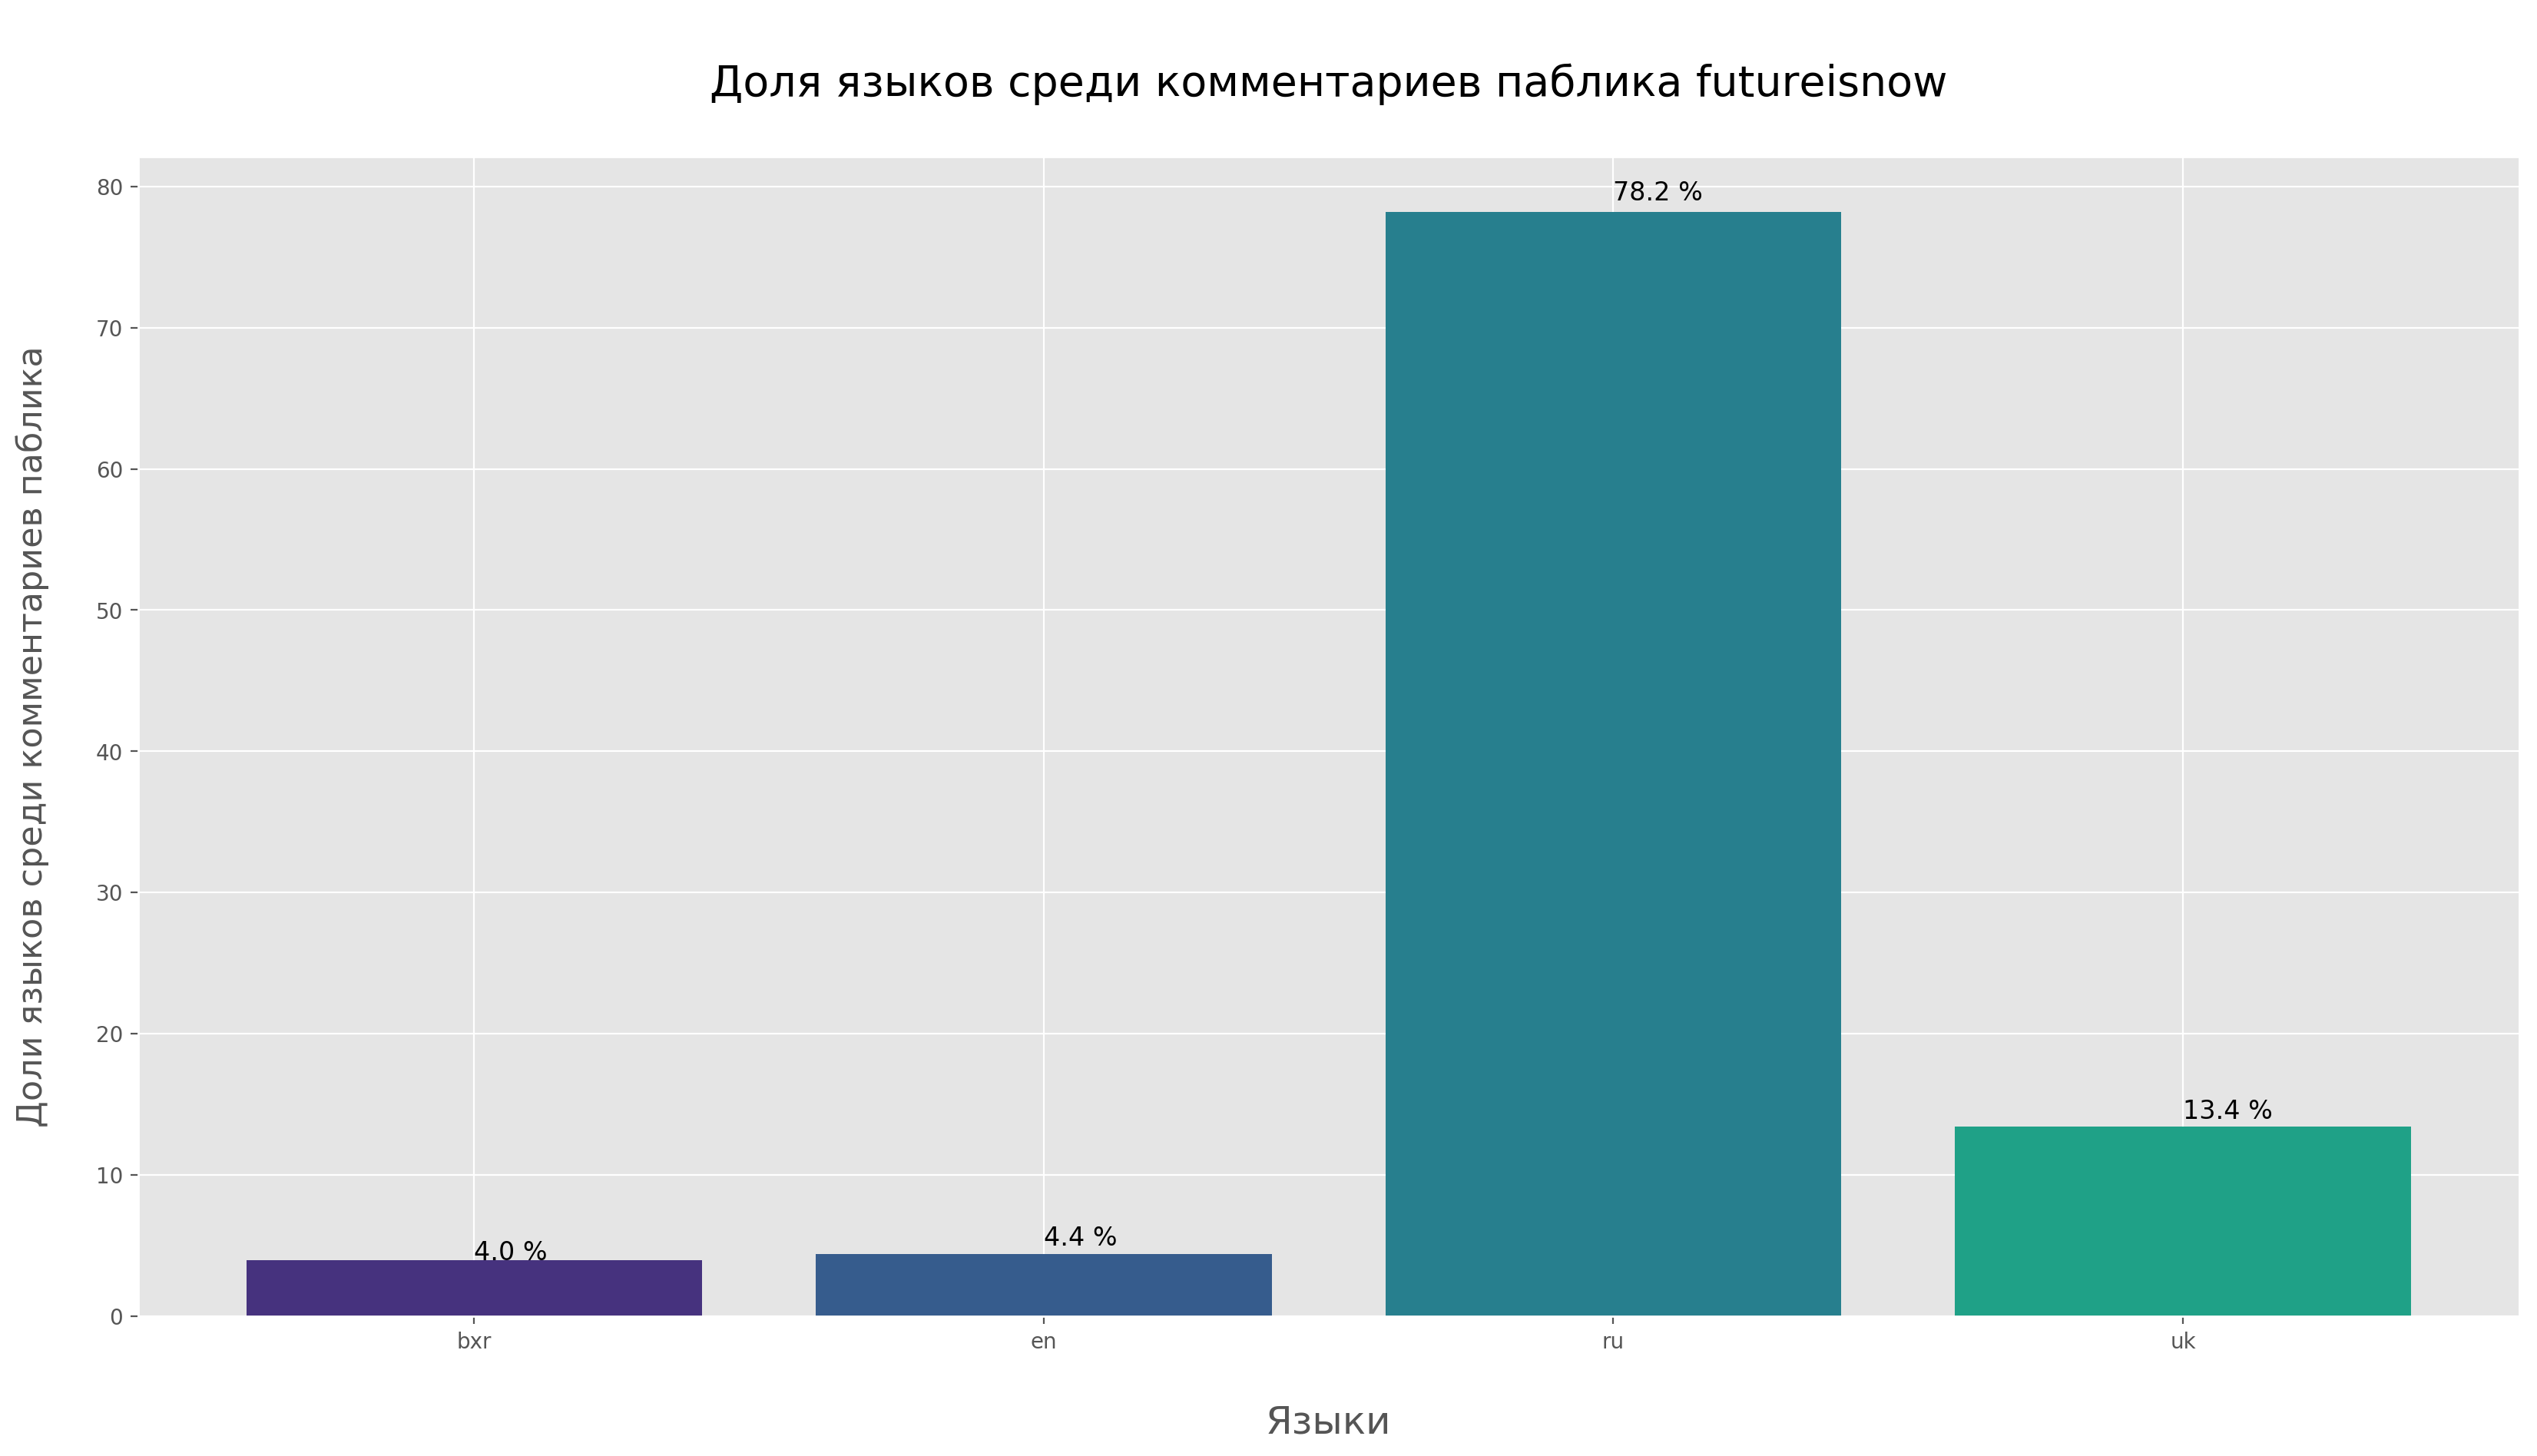

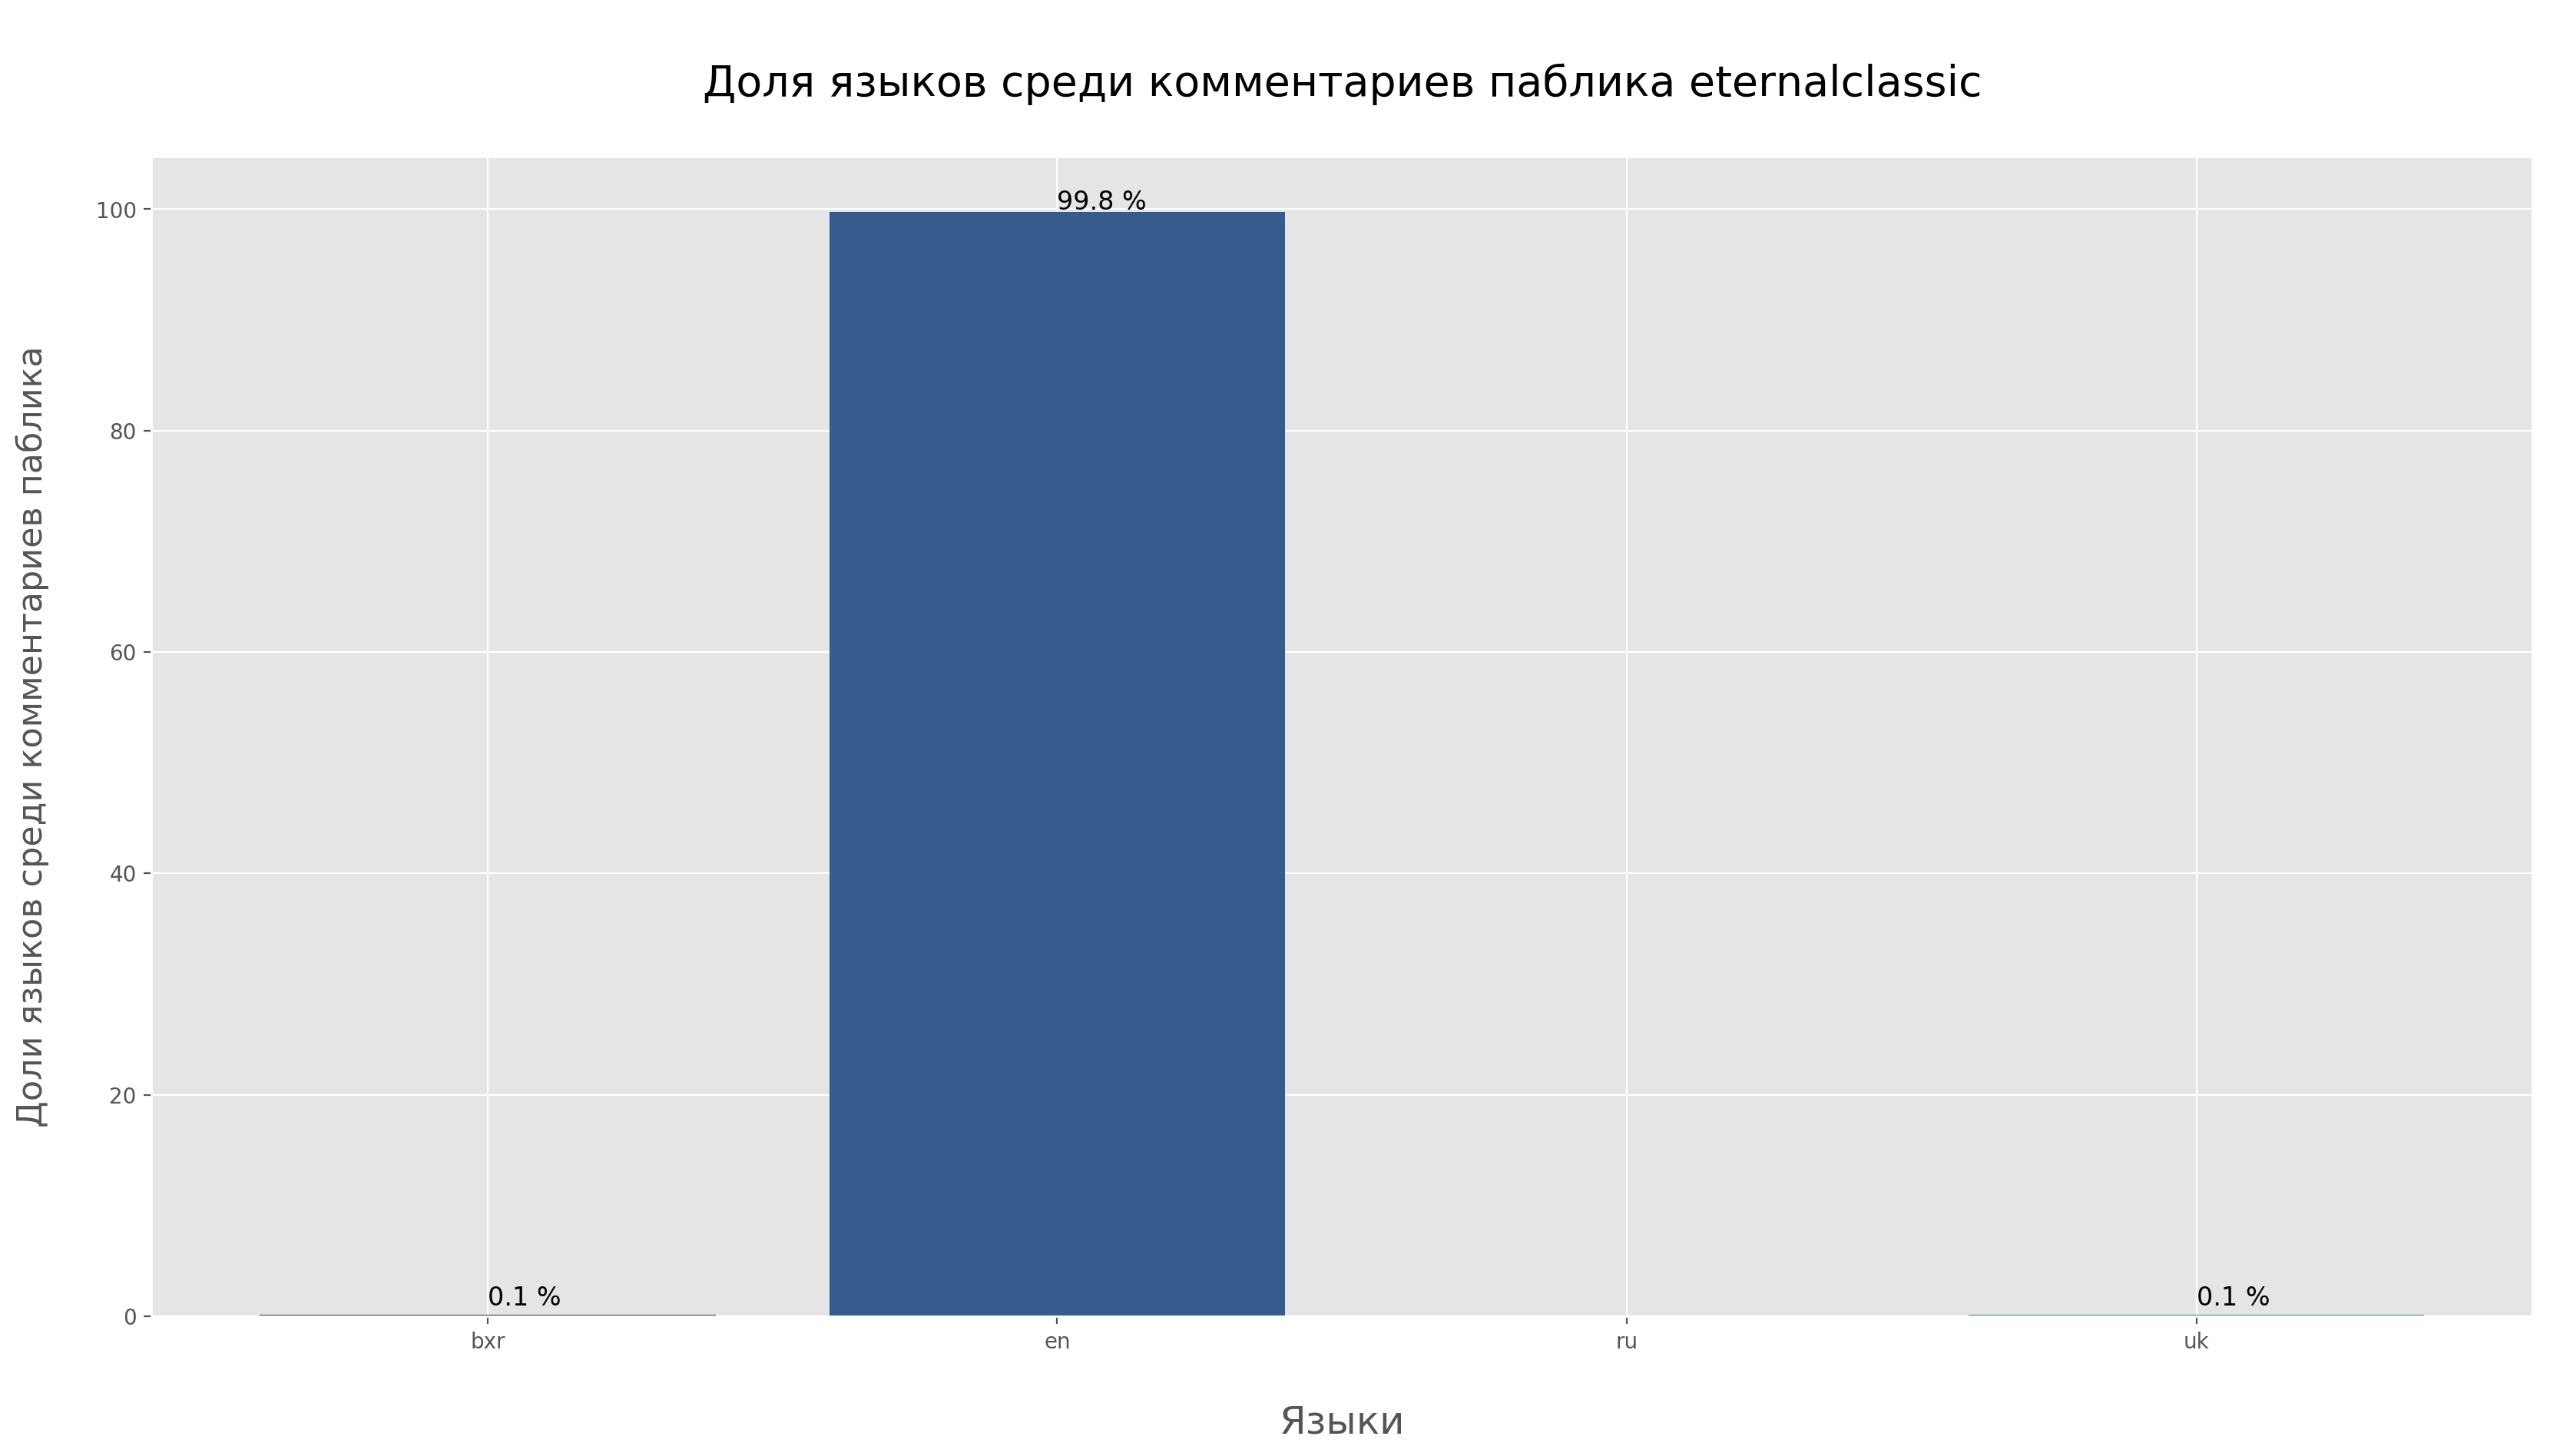

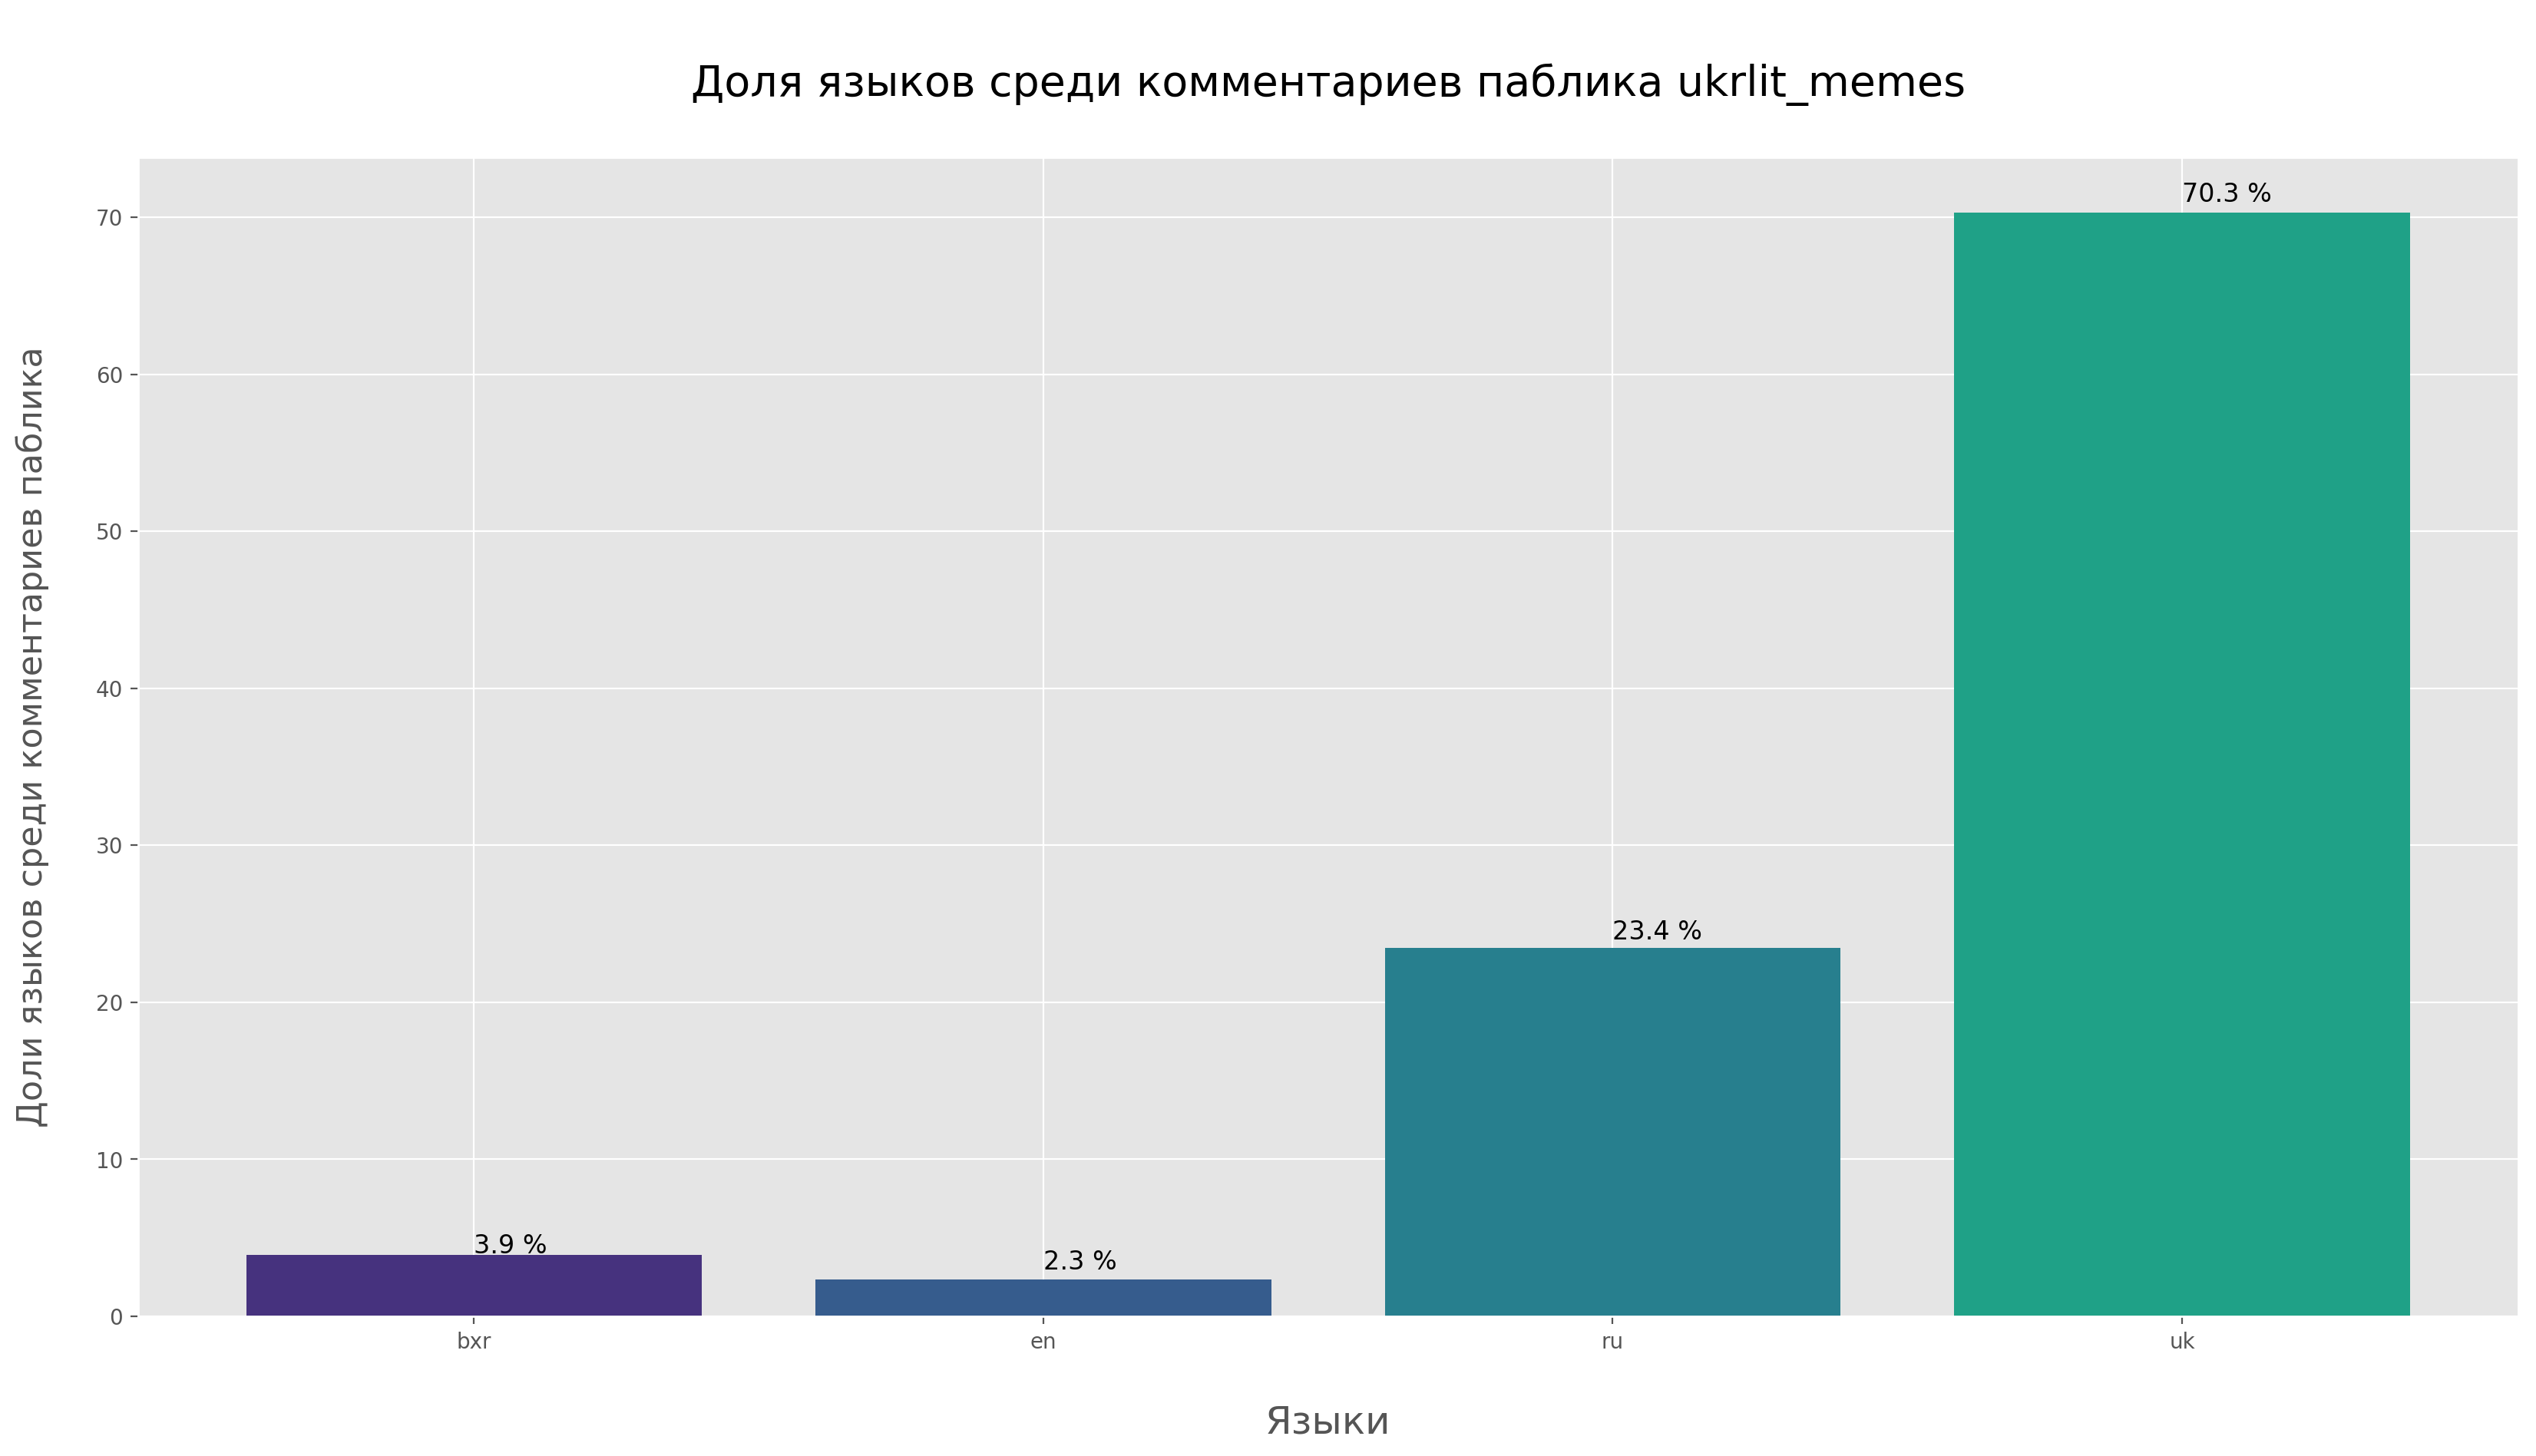

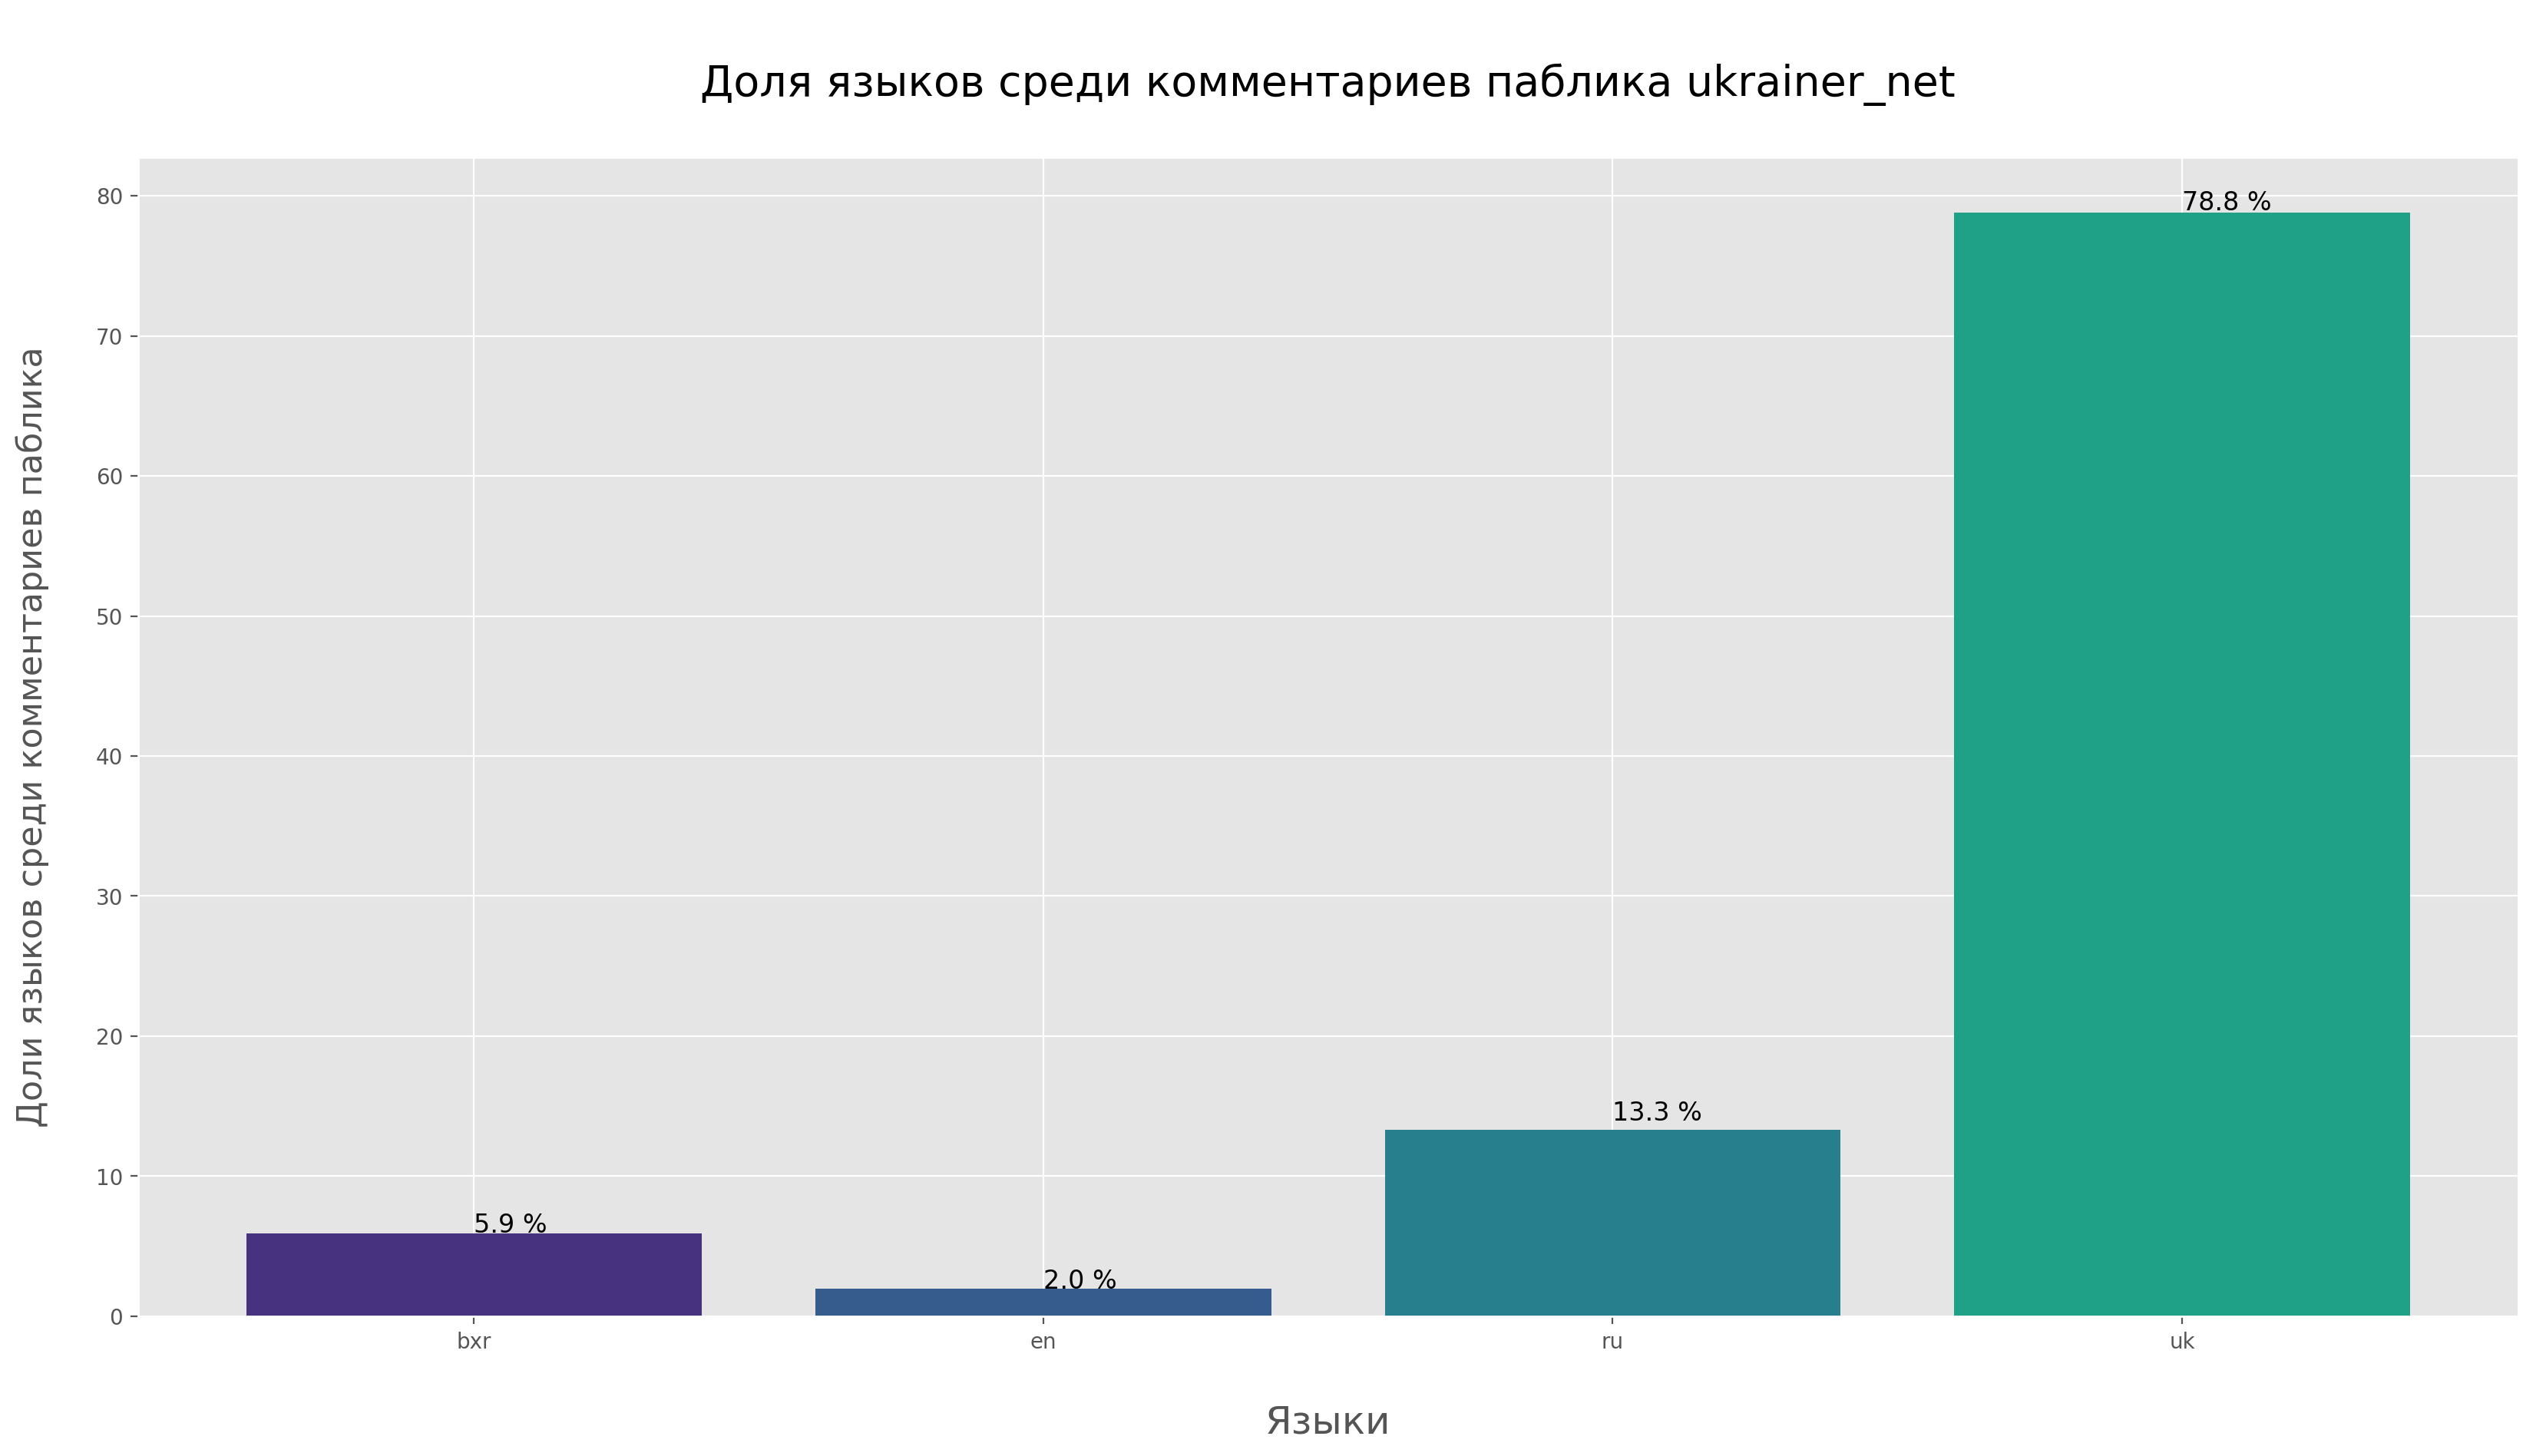

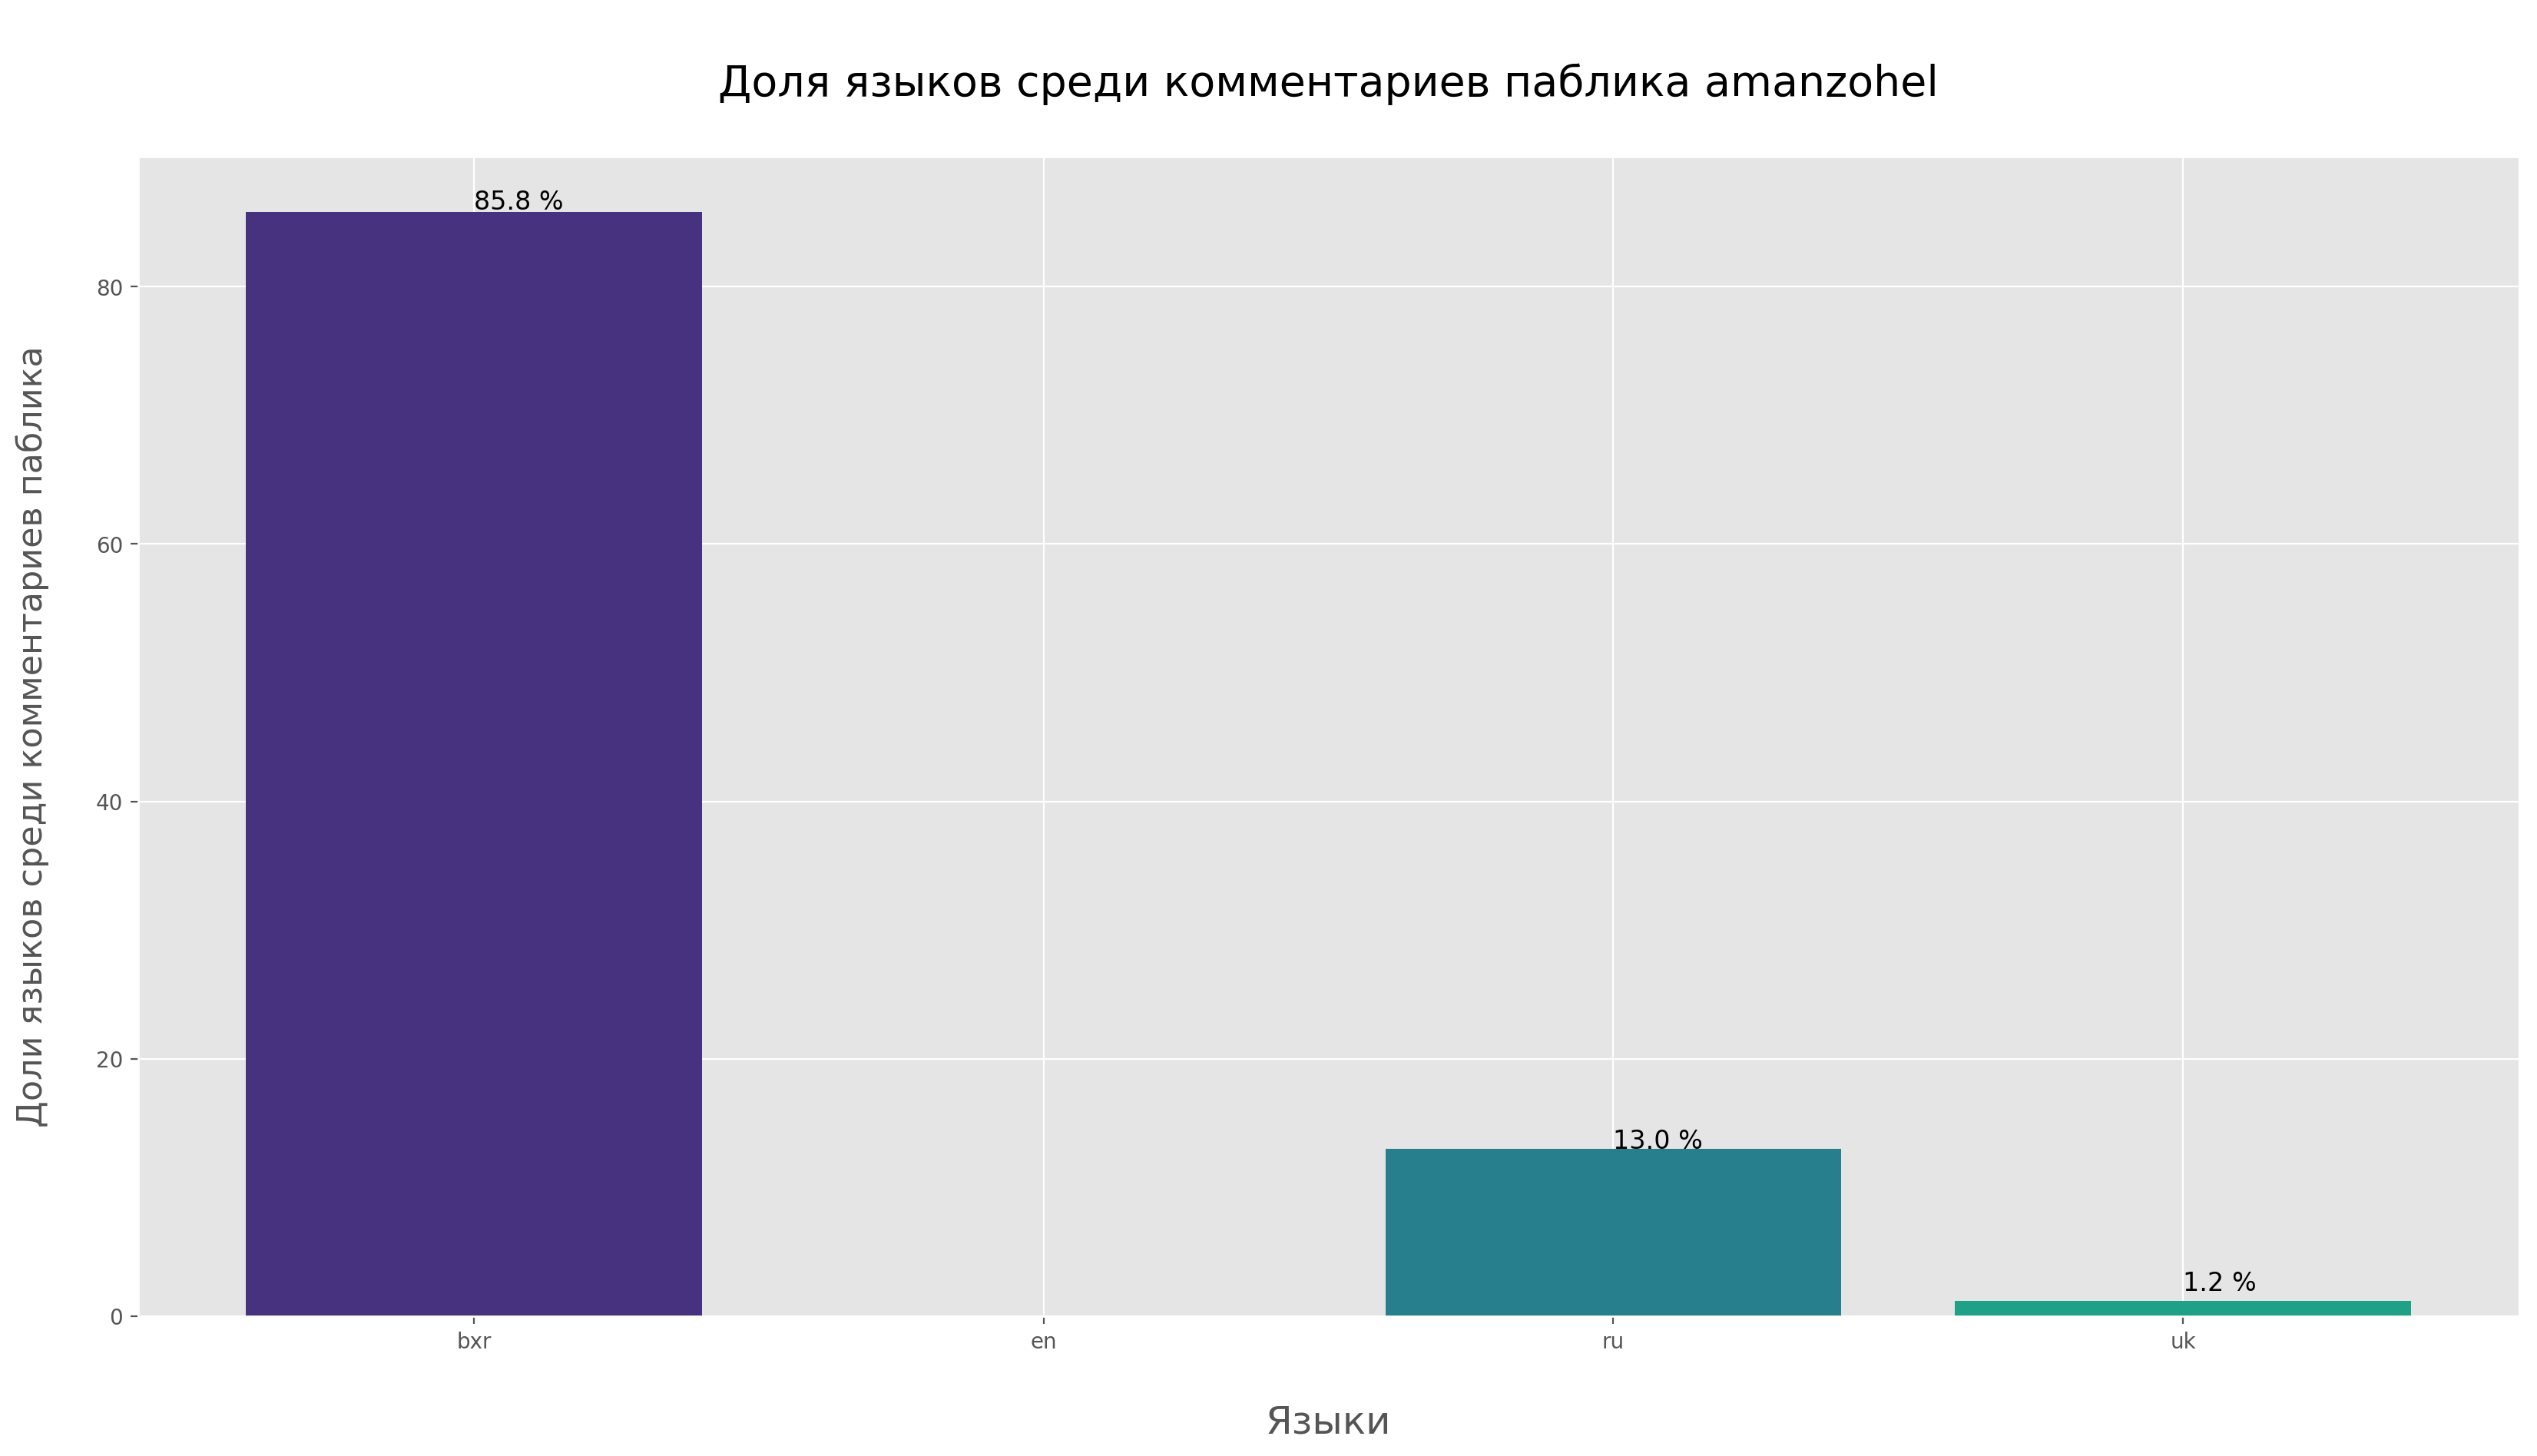

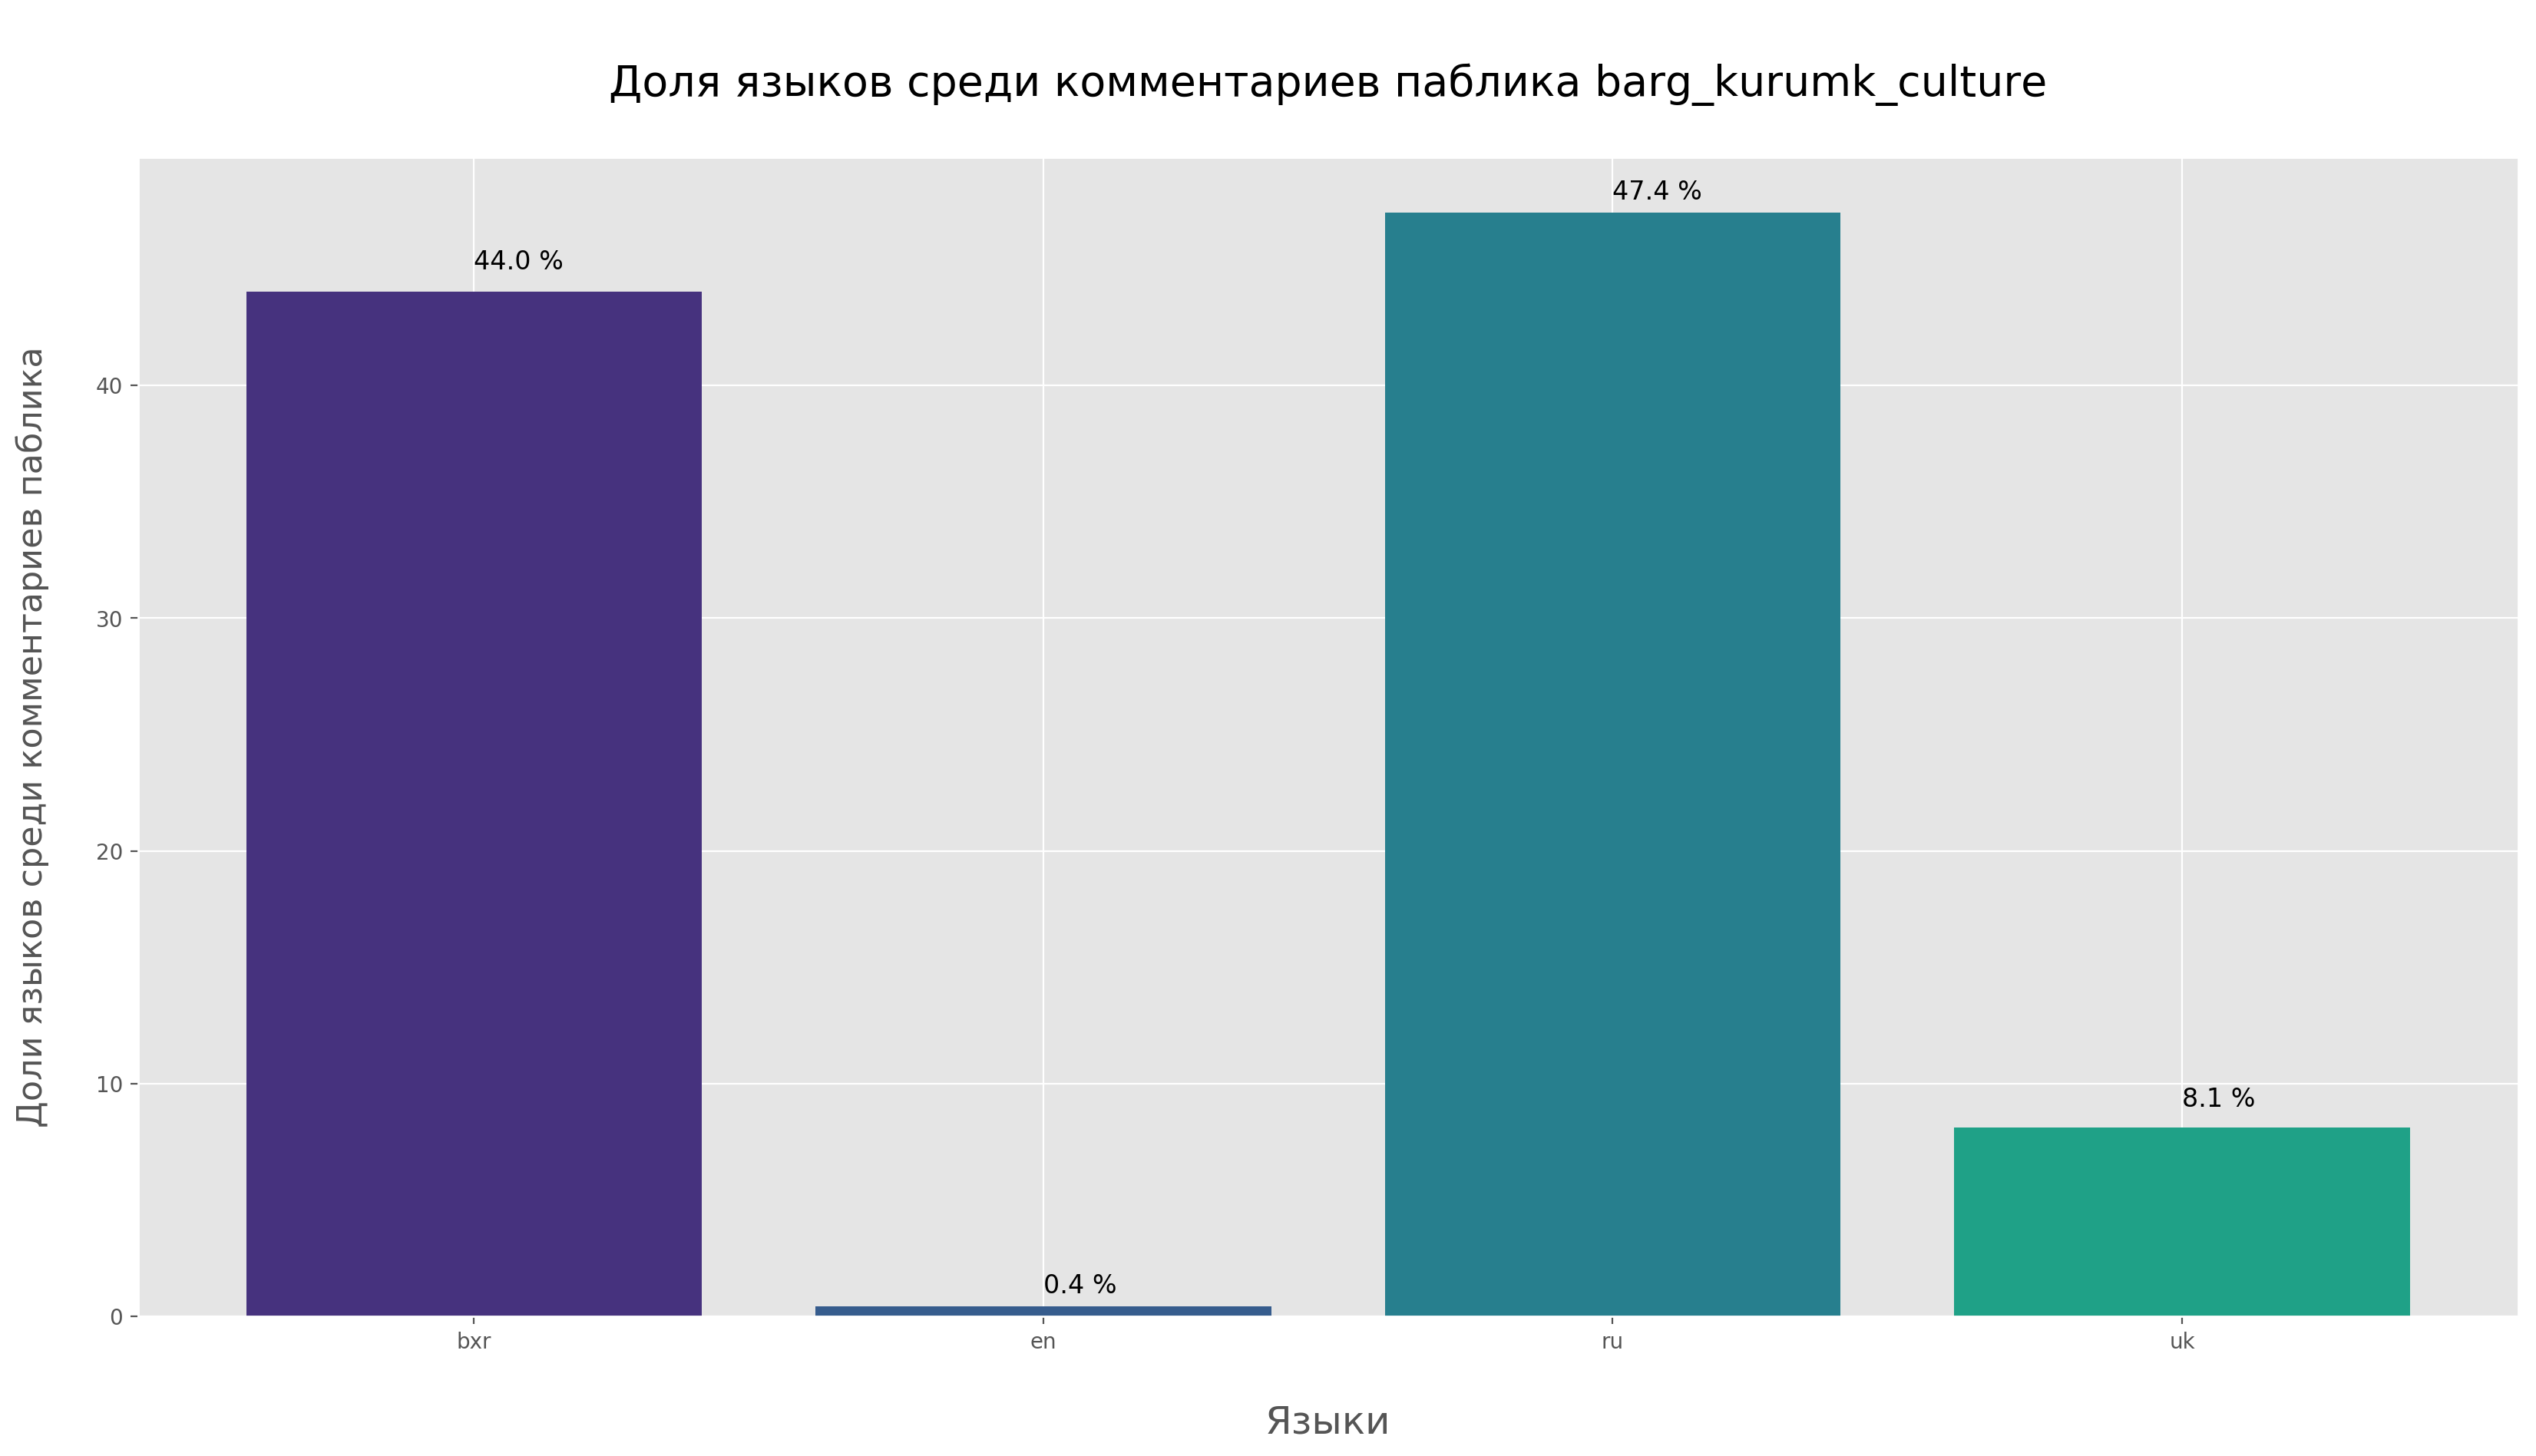

In [249]:
for_graph2 = {}  # словарь для графика
for k, v in lang_detects_ngrams.items():
    max_lan = v['total']
    for key, values in v.items():
        if key != 'total':
            for_graph2[key] = (values*100)/max_lan
    lang_nums = [c[1] for c in sorted(for_graph2.items(), key=lambda x: x[0],
                                      reverse=False)]  # данные по оси y
    lang_labs = [c_1[0] for c_1 in sorted(for_graph2.items(),
                                          key=lambda x: x[0], reverse=False)]
    colors = sns.color_palette('viridis')  # цветовая гамма
    plt.figure(figsize=(20, 10), dpi=200)  # размер графика
    plt.bar(lang_labs, lang_nums, color=colors)  # график
    for a, b in zip(lang_labs, lang_nums):  # подписи
        if b > 0:
            plt.scatter(a, int(b), s=0)
            plt.text(a, int(b)+1, '%.1f %%' % (b), fontsize=12)
    # подбираем название
    pub_name = ''
    if k == -111587102:
        pub_name = 'futureisnow'
    if k == -129440544:
        pub_name = 'eternalclassic'
    if k == -131348832:
        pub_name = 'ukrlit_memes'
    if k == -5164516:
        pub_name = 'ukrainer_net'
    if k == -66347916:
        pub_name = 'amanzohel'
    if k == -95189895:
        pub_name = 'barg_kurumk_culture'
    naming = pub_name + '_ngram_comment.png'
    for_title = '\nДоля языков среди комментариев паблика ' + pub_name + '\n'
    plt.title(for_title, fontsize=20)
    plt.ylabel('Доли языков среди комментариев паблика\n',  fontsize=16)
    plt.xlabel('\nЯзыки',  fontsize=18)
    # cкачиваем график
    plt.savefig(naming, dpi=200, fromat='png', bbox_inches='tight')

Обсудите работу каждого из классификаторов, обсудите ошибки, объясните разницу в результатах.


### Клиссификатор по частотным словам:
* такая определялка работает не всегда точно, например, очень часто она просто не определяет язык (т.е. после анализа комментария выдает список, где каждому языку присваивается 0) => несмотря на то, что комментарии были отобраны по своей длине, больше 10 символов, классфикатор работает более или менее нормально только для комментариев длиной более 15-17 символов (но тоже работает не всегда)
* иногда невозможно определить язык для комментрия, так как в списке языков одно и то же значение присваивается разным языкам => сильная неоднозначность
* за счет того, что в частотных словарях слова дублируются для разных языков: русский/украинский/бурятский (иногда в словарях встречаются английские слова) - классификатор может неправильно определять язык комментариев (например, вместо украинского или бурятского зачастую показывает русский)
* таким образом, либо большая доля комментариев является вообще непригодной для определения языка (unknown), либо язык, который должен быть не определяется и показывается другой, также слова из комментариев просто не включают ни одно из слов из частотного словаря


### Клиссификатор по н-граммам:
* язык более или менее однозначно определяется для каждого комментария даже длины от 10 символов => более однозначно, чем предыдущий классификатор, нет такого, что язык не определяется (каждому комментарию присваивается язык)
* результат более точный, так как строится полноценная модель по последовательности символов, а не просто частотный словарь из 100 слов, которые едва ли могут встретиться в комментариях


### Сравнение



Паблик|Определялка по частотам|Определялка по н-граммам
---|:---:|:---:
futureisnow|Русский|Русский
eternalclassic|Английский|Английский
ukrlit_memes|Украинский (больше всего неопределенного)|Украинский
ukrainer_net|Украинский|Украинский
amanzohel|Русский (больше всего неопределнного, немного ниже бурятский)|Бурятский
barg_kurumk_culture|Русский (больше всего неопределенного)|Русский


Сравнение показало, что в общем, определялки почти всегда дают близкий результат, однако классификатор по н-граммам работает лучше и точнее определяет язык, так, для 5 паблика он смог определить бурятский как самый частотный среди комментариев к нему, в то время, как классификатор по частотным словам все-таки выбрал русский как самый частотный (за исключением неопределенного), хотя бурятский тоже показан как часто-употребляемый.

Вообще, в комментариях в ВК часто используются смайлики, разные слова, которые употребляются только людьми из конкретных групп (специфические слова, которые не встречаются в статьях ВИКИ), вероятно, поэтому было сложно использовать частотный классификатор (именно поэтому лучшим показался классификатор по н-граммам).